In [104]:
import numpy as np

def get_ttcs(results):
    """
    Get the time to consensus for each of the results
    """
    return results.reporters.loc[results.reporters['Decision'] == "Correct decision", 'Time to consensus']

def loop(results, variable, correct_consensus_indices):
    df = results.variables.Model[variable].loc[correct_consensus_indices]
    array = np.full((len(correct_consensus_indices), 1001), np.nan, dtype=np.float16)
    row_idx = 0
    for i in range(len(df)):
        if i in correct_consensus_indices:
            sim_run = df[i]
            for ii in range(len(sim_run)):
                array[row_idx, ii] = sim_run[ii]
            row_idx += 1
        else:
            continue
    return array

def get_opinions(results):
    """
    Get the number of agents with a belief in the correct hypothesis at each time step
    """
    # Get the indices of correct consensuses
    correct_consensus_indices = results.reporters.index[results.reporters['Decision'] == "Correct decision"].tolist()
    # Get all the number of agents
    nHealthy = loop(results, 'nHealthy', correct_consensus_indices)
    nFaulty = loop(results, 'nFaulty', correct_consensus_indices)
    nTracking = loop(results, 'nTracking', correct_consensus_indices)
    nH1 = loop(results, 'nH1', correct_consensus_indices)
    nH2 = loop(results, 'nH2', correct_consensus_indices)
    pH1 = nH1/nHealthy

    return nHealthy, nFaulty, nTracking, nH1, nH2, pH1

In [5]:
import os
import _pickle as pickle

Results = {'TTC' : {}, 'nHealthy' : {}, 'nFaulty' : {}, 'nTracking' : {}, 'nH1' : {}, 'nH2' : {}, 'pH1' : {}}

for file in os.listdir("multi_runs/"):
    with open(f'multi_runs/{file}', 'rb') as f:
        results = pickle.load(f)

    ttc = get_ttcs(results)
    nHealthy, nFaulty, nTracking, nH1, nH2, pH1 = get_opinions(results)

    Results['TTC'][file] = ttc
    Results['nHealthy'][file] = nHealthy
    Results['nFaulty'][file] = nFaulty
    Results['nTracking'][file] = nTracking
    Results['nH1'][file] = nH1
    Results['nH2'][file] = nH2
    Results['pH1'][file] = pH1




# Time to consensus

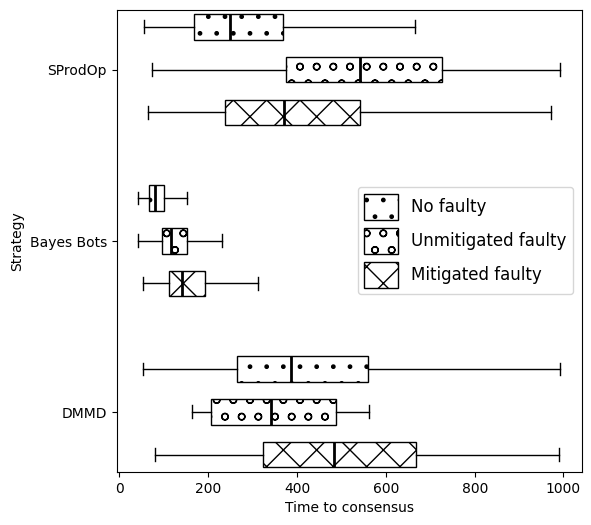

In [36]:
# 1 graph, with three clusters of box plots
# - No faulty agents
# - Mitigated faulty agents
# - Unmitigated faulty agents

import matplotlib.pyplot as plt

# Set up graph
fig, ax = plt.subplots(1,1, figsize = (6,6), dpi=100)

positions = np.array([12, 11.75, 11.5])

# Define hatch patterns
hatch_patterns = ['.', 'o', 'x']#, '-', '|', 'o', '*']


# Plot data
for i, decision_strategy in enumerate(["Pool", "BBots", "DMMD"]):
    # Non faulty
    box = ax.boxplot((Results['TTC'][decision_strategy+"-NF"], # No faulty agents
                Results['TTC'][decision_strategy+"-F"],  # Unmitigated faulty agents
                Results['TTC'][decision_strategy+"-MF"]), # Mitigated faulty agents
                vert=False, positions=positions, sym='',
                patch_artist=True,
                medianprops=dict(color='black',linewidth=2))
    positions -= 1
    

    # Set colours
    for i in range(3):
        box['boxes'][i].set_facecolor('white')  # Set box fill color to white
        box['boxes'][i].set_edgecolor('black')  # Set box edge color to black
        box['boxes'][i].set_hatch(hatch_patterns[i])

        #box['boxes'][1].set_hatch(hatch_patterns[1])
        #box['boxes'][2].set_hatch(hatch_patterns[2])

ax.legend([box['boxes'][0], box['boxes'][1], box['boxes'][2]], 
          ['No faulty', 'Unmitigated faulty', 'Mitigated faulty'],
          fontsize='large',
          handlelength=2,
          handleheight=2)
    

# Format
#decision_methods = ["SProdOp", "BBots", "DMMD"]


ax.set_ylim(9.4,12.1)

ax.set_ylabel('Strategy')
ax.set_yticks([11.75, 10.75, 9.75])
ax.set_yticklabels(['SProdOp', 'Bayes Bots', 'DMMD'])

ax.set_xlabel('Time to consensus')
    


plt.show()






In [38]:
for key, i in Results['TTC'].items():
    print(np.median(i))
    print(key + " " + str(len(i)))

542.0
Pool-F 548
117.0
BBots-F 111
341.0
DMMD-F 6
387.0
DMMD-NF 857
80.0
BBots-NF 622
484.0
DMMD-MF 363
141.5
BBots-MF 634
369.5
Pool-MF 934
250.0
Pool-NF 992


# Opinion spread

/Users/paddy/Codingprojects/Python/bon-sim/env/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a, func=_nanmedian, keepdims=keepdims,
/var/folders/tx/vy1d11q96tb4qmkqh7r1rjd40000gn/T/ipykernel_10714/2829533686.py:21: RuntimeWarning: All-NaN slice encountered
  axes[i].plot(range(0,1001), np.nanmedian(Results['pH1'][decision_strategy+"-F"], axis=0), c='m')
/var/folders/tx/vy1d11q96tb4qmkqh7r1rjd40000gn/T/ipykernel_10714/2829533686.py:19: RuntimeWarning: All-NaN slice encountered
  axes[i].plot(range(0,1001), np.nanmedian(Results['pH1'][decision_strategy+"-MF"], axis=0), c='r')


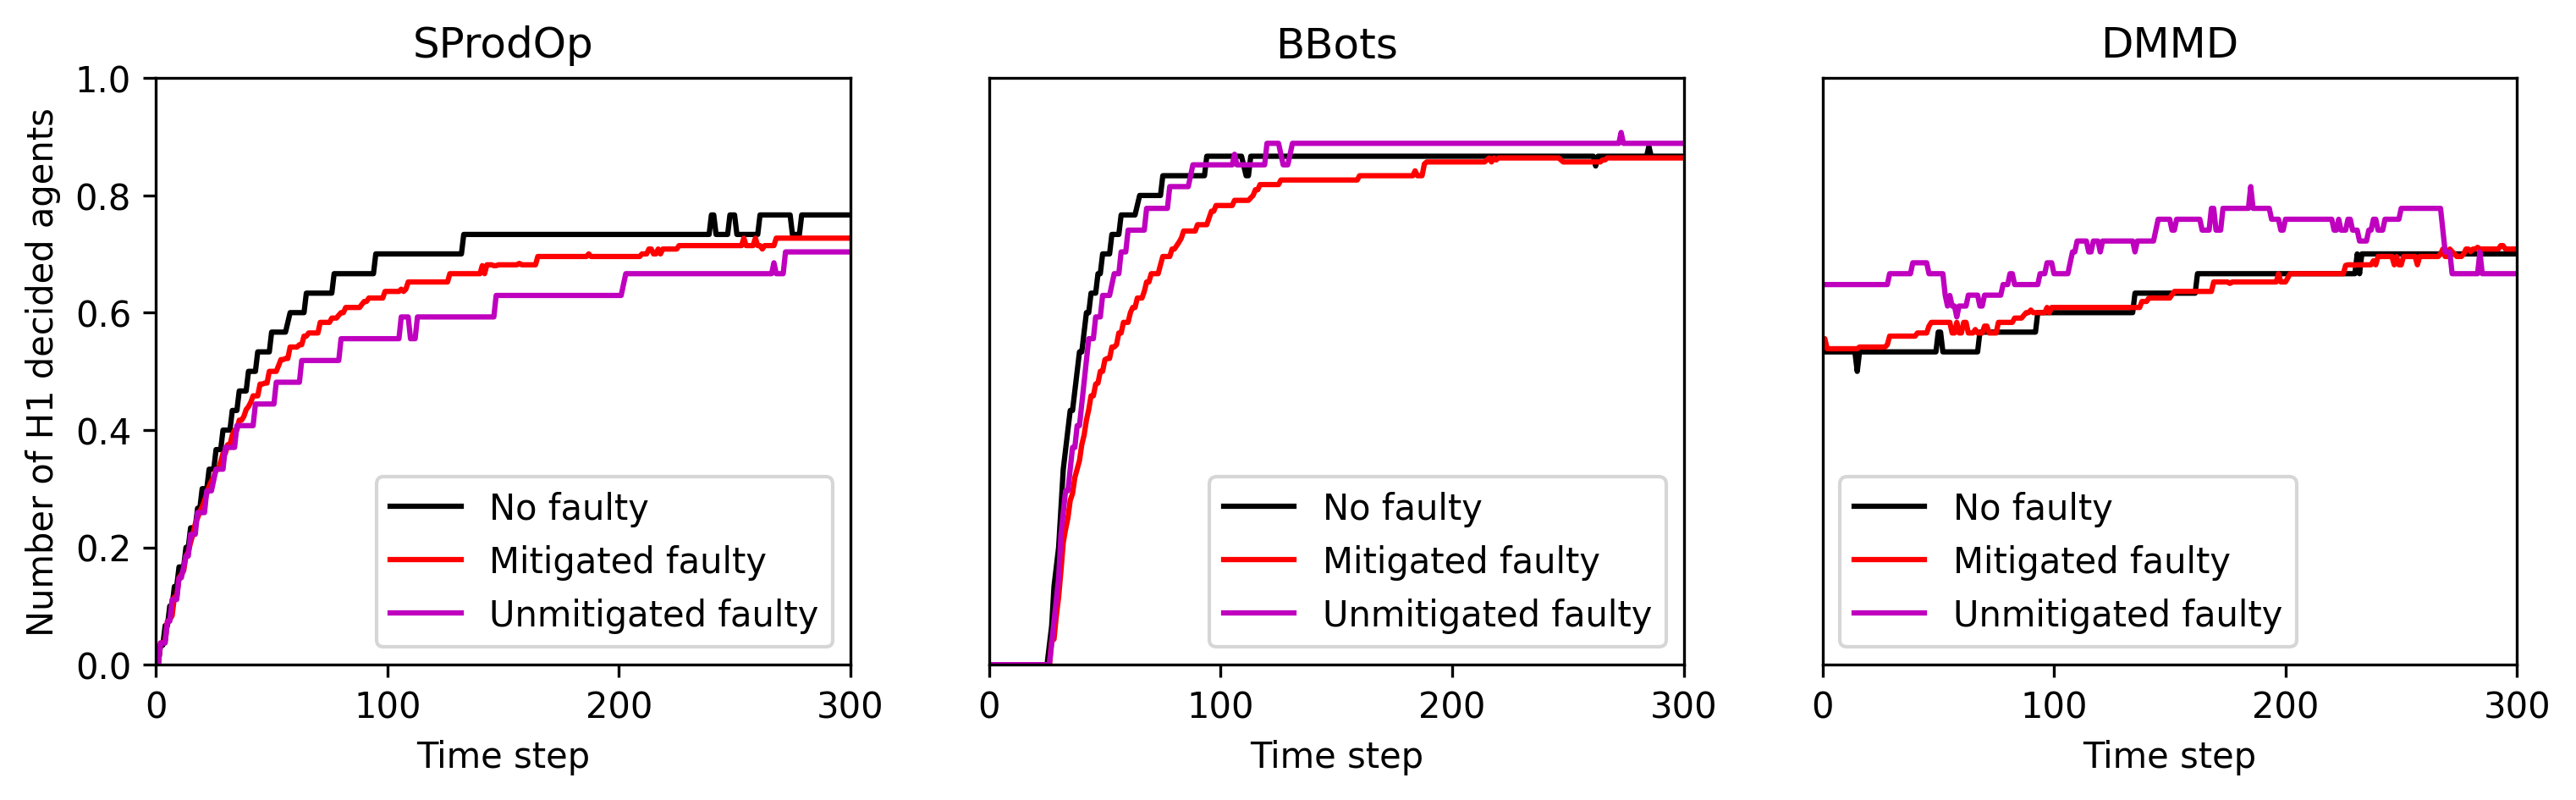

In [39]:
# 3 graphs, one for each SProdOp scenario 
# - No faulty agents
# - Mitigated faulty agents
# - Unmitigated faulty agents
# On each graph, box plots showing the spread of opinion between each simulation at each timestep

import matplotlib.pyplot as plt

cutoff = 300

# Set up graph
fig, axes = plt.subplots(1,3, figsize = (12,3), dpi=300)

# Plot data
for i, decision_strategy in enumerate(["Pool", "BBots", "DMMD"]):
    # Non faulty
    axes[i].plot(range(0,1001), np.nanmedian(Results['pH1'][decision_strategy+"-NF"], axis=0), c='k')

    axes[i].plot(range(0,1001), np.nanmedian(Results['pH1'][decision_strategy+"-MF"], axis=0), c='r')

    axes[i].plot(range(0,1001), np.nanmedian(Results['pH1'][decision_strategy+"-F"], axis=0), c='m')
    
# Format
decision_methods = ["SProdOp", "BBots", "DMMD"]

for i, decision_method in enumerate(decision_methods):
    axes[i].set_xlabel("Time step")
    axes[i].set_title(decision_method)
    axes[i].set_xlim(0,cutoff)
    axes[i].set_xticks(range(0,cutoff+1, 100))
    axes[i].set_xticklabels(range(0,cutoff+1, 100))
    axes[i].set_ylim(0,1)
    axes[i].legend(['No faulty', 'Mitigated faulty', 'Unmitigated faulty'])

    
axes[0].set_ylabel("Number of H1 decided agents")

axes[1].tick_params(left = False, labelleft = False)
axes[2].tick_params(left = False, labelleft = False)
    


plt.show()

In [7]:
# Format
decision_methods = ["Pool-F", "Pool-MF", "Pool-NF"]

box_positions = range(0,1000,25)
# Plot data
for i, decision_strategy in enumerate(decision_methods):
    # Non faulty
    #axes[i].boxplot(Results['nH1'][decision_strategy][:,box_positions], # No faulty agents
    #                positions=box_positions, widths = 20, sym='')
    axes[i].plot(range(0,1001), np.median(Results['nH1'][decision_strategy], axis=0), c='k')

In [45]:
import os
import _pickle as pickle

Results = {'TTC' : {}}

for folder in os.listdir("parameter_sweep/"):
    for file in os.listdir("parameter_sweep/"+folder):
        with open(f'parameter_sweep/{folder+"/"+file}', 'rb') as f:
            try:
                results = pickle.load(f)
            except:
                print('error', f)

        ttc = get_ttcs(results)

        Results['TTC'][file] = ttc

In [111]:
with open(f'multi_runs/BBots-NF', 'rb') as f:
            try:
                results = pickle.load(f)
            except:
                print('error', f)

In [114]:
print(results.parameters.constants)

{'size': 200, 'fill_ratio': 0.25, 'steps': 1000, 'ndim': 2, 'healthy_population': 30, 'faulty_population': 0, 'detection_radius': 30, 'faulty_search_rate': 0.0, 'detection_chance': 0.8, 'speed': 1, 'record_positions': True, 'movement_type': 'random_walk', 'opinion_updating_strategy': 'bbots', 'time_period': 50, 'tau': 20, 'alpha_0': 40, 'p_c': 0.99, 'u_plus': True}


In [105]:


for key, i in Results['TTC'].items():
    print(key + " " + str(len(i)))

Pool-FP-2 899
Pool-FP-5 873
Pool-FP-4 894
Pool-FP-3 890
DMMD-FP-1 338
BBots-FP-1 742
DMMD-FP-3 284
DMMD-FP-4 276
Pool-FP-1 918
DMMD-FP-5 277
DMMD-FP-2 322
BBots-FP-2 749
BBots-FP-5 818
BBots-FP-4 780
BBots-FP-3 773
Pool-TP-84 914
BBots-TP-92 741
DMMD-TP-88 309
DMMD-TP-80 323
DMMD-TP-92 318
BBots-TP-80 728
Pool-TP-96 900
BBots-TP-88 728
Pool-TP-80 930
BBots-TP-96 732
Pool-TP-88 918
DMMD-TP-84 332
DMMD-TP-96 293
BBots-TP-84 743
Pool-TP-92 908
DMMD-96-5 270
DMMD-92-4 253
Pool-84-2 914
DMMD-80-1 350
DMMD-88-3 275
BBots-88-3 764
BBots-80-1 720
BBots-92-4 786
BBots-96-5 806
Pool-96-5 876
Pool-92-4 898
Pool-88-3 896
DMMD-84-2 309
Pool-80-1 915
BBots-84-2 759


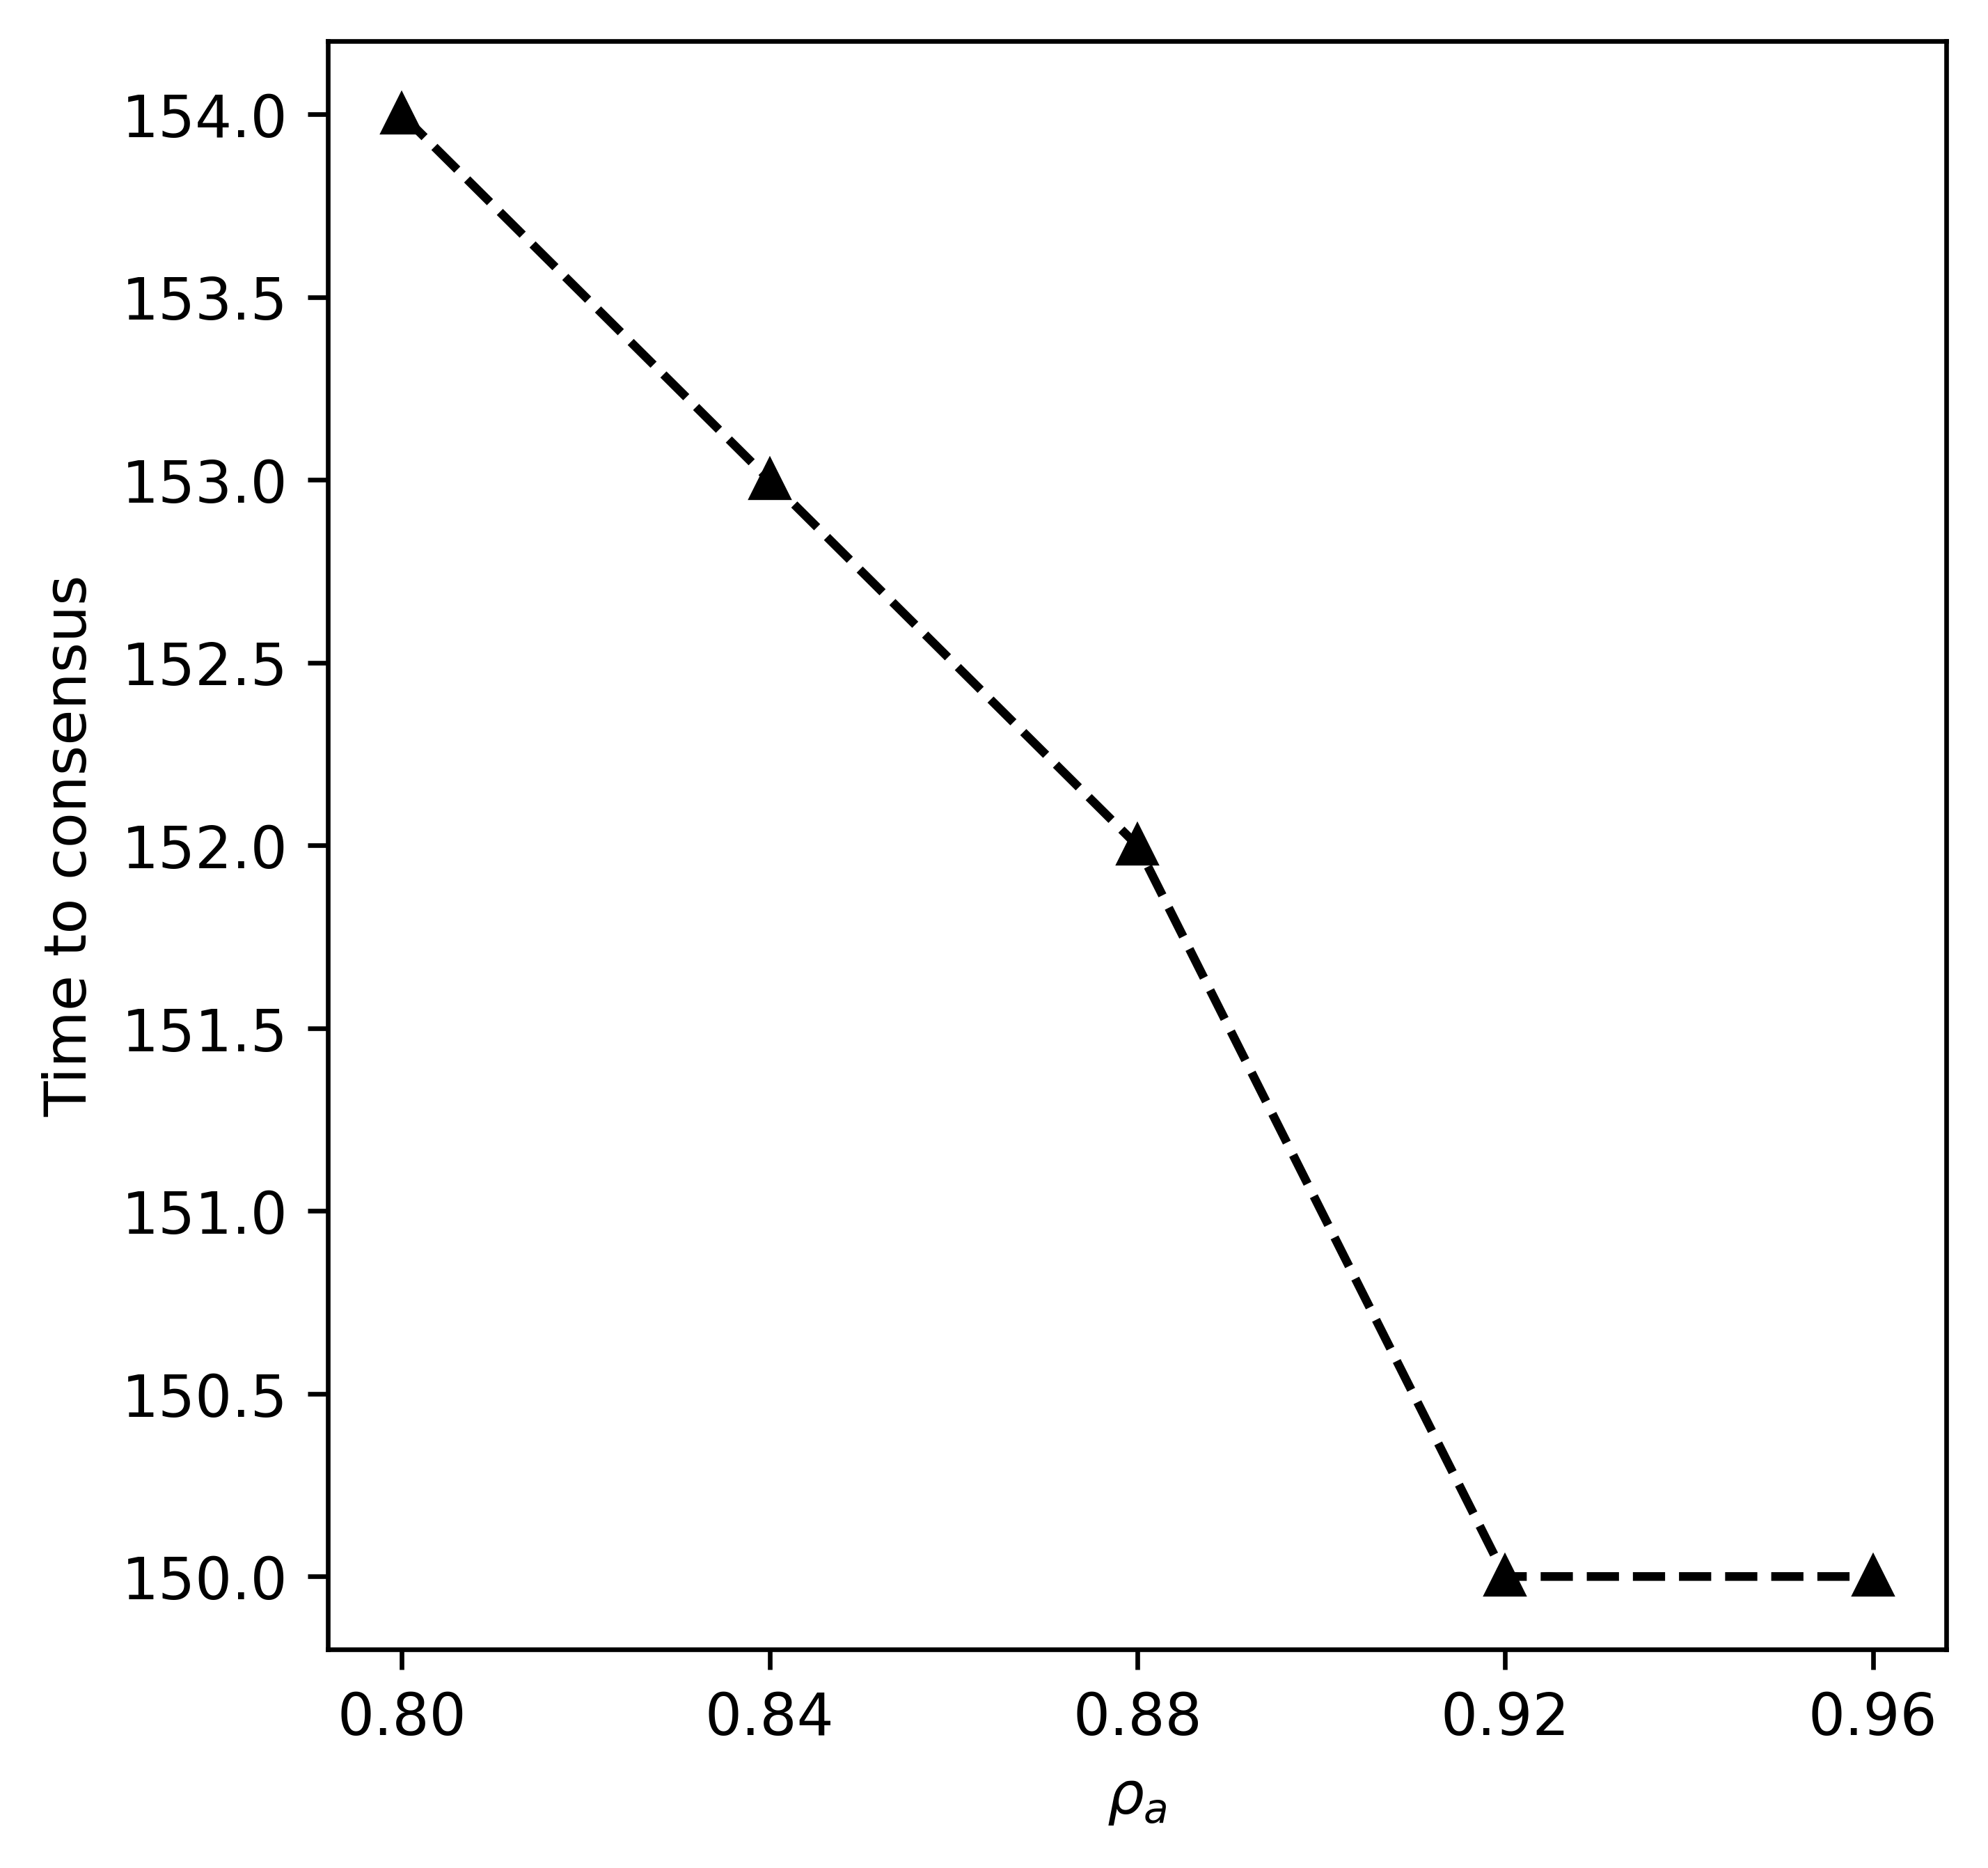

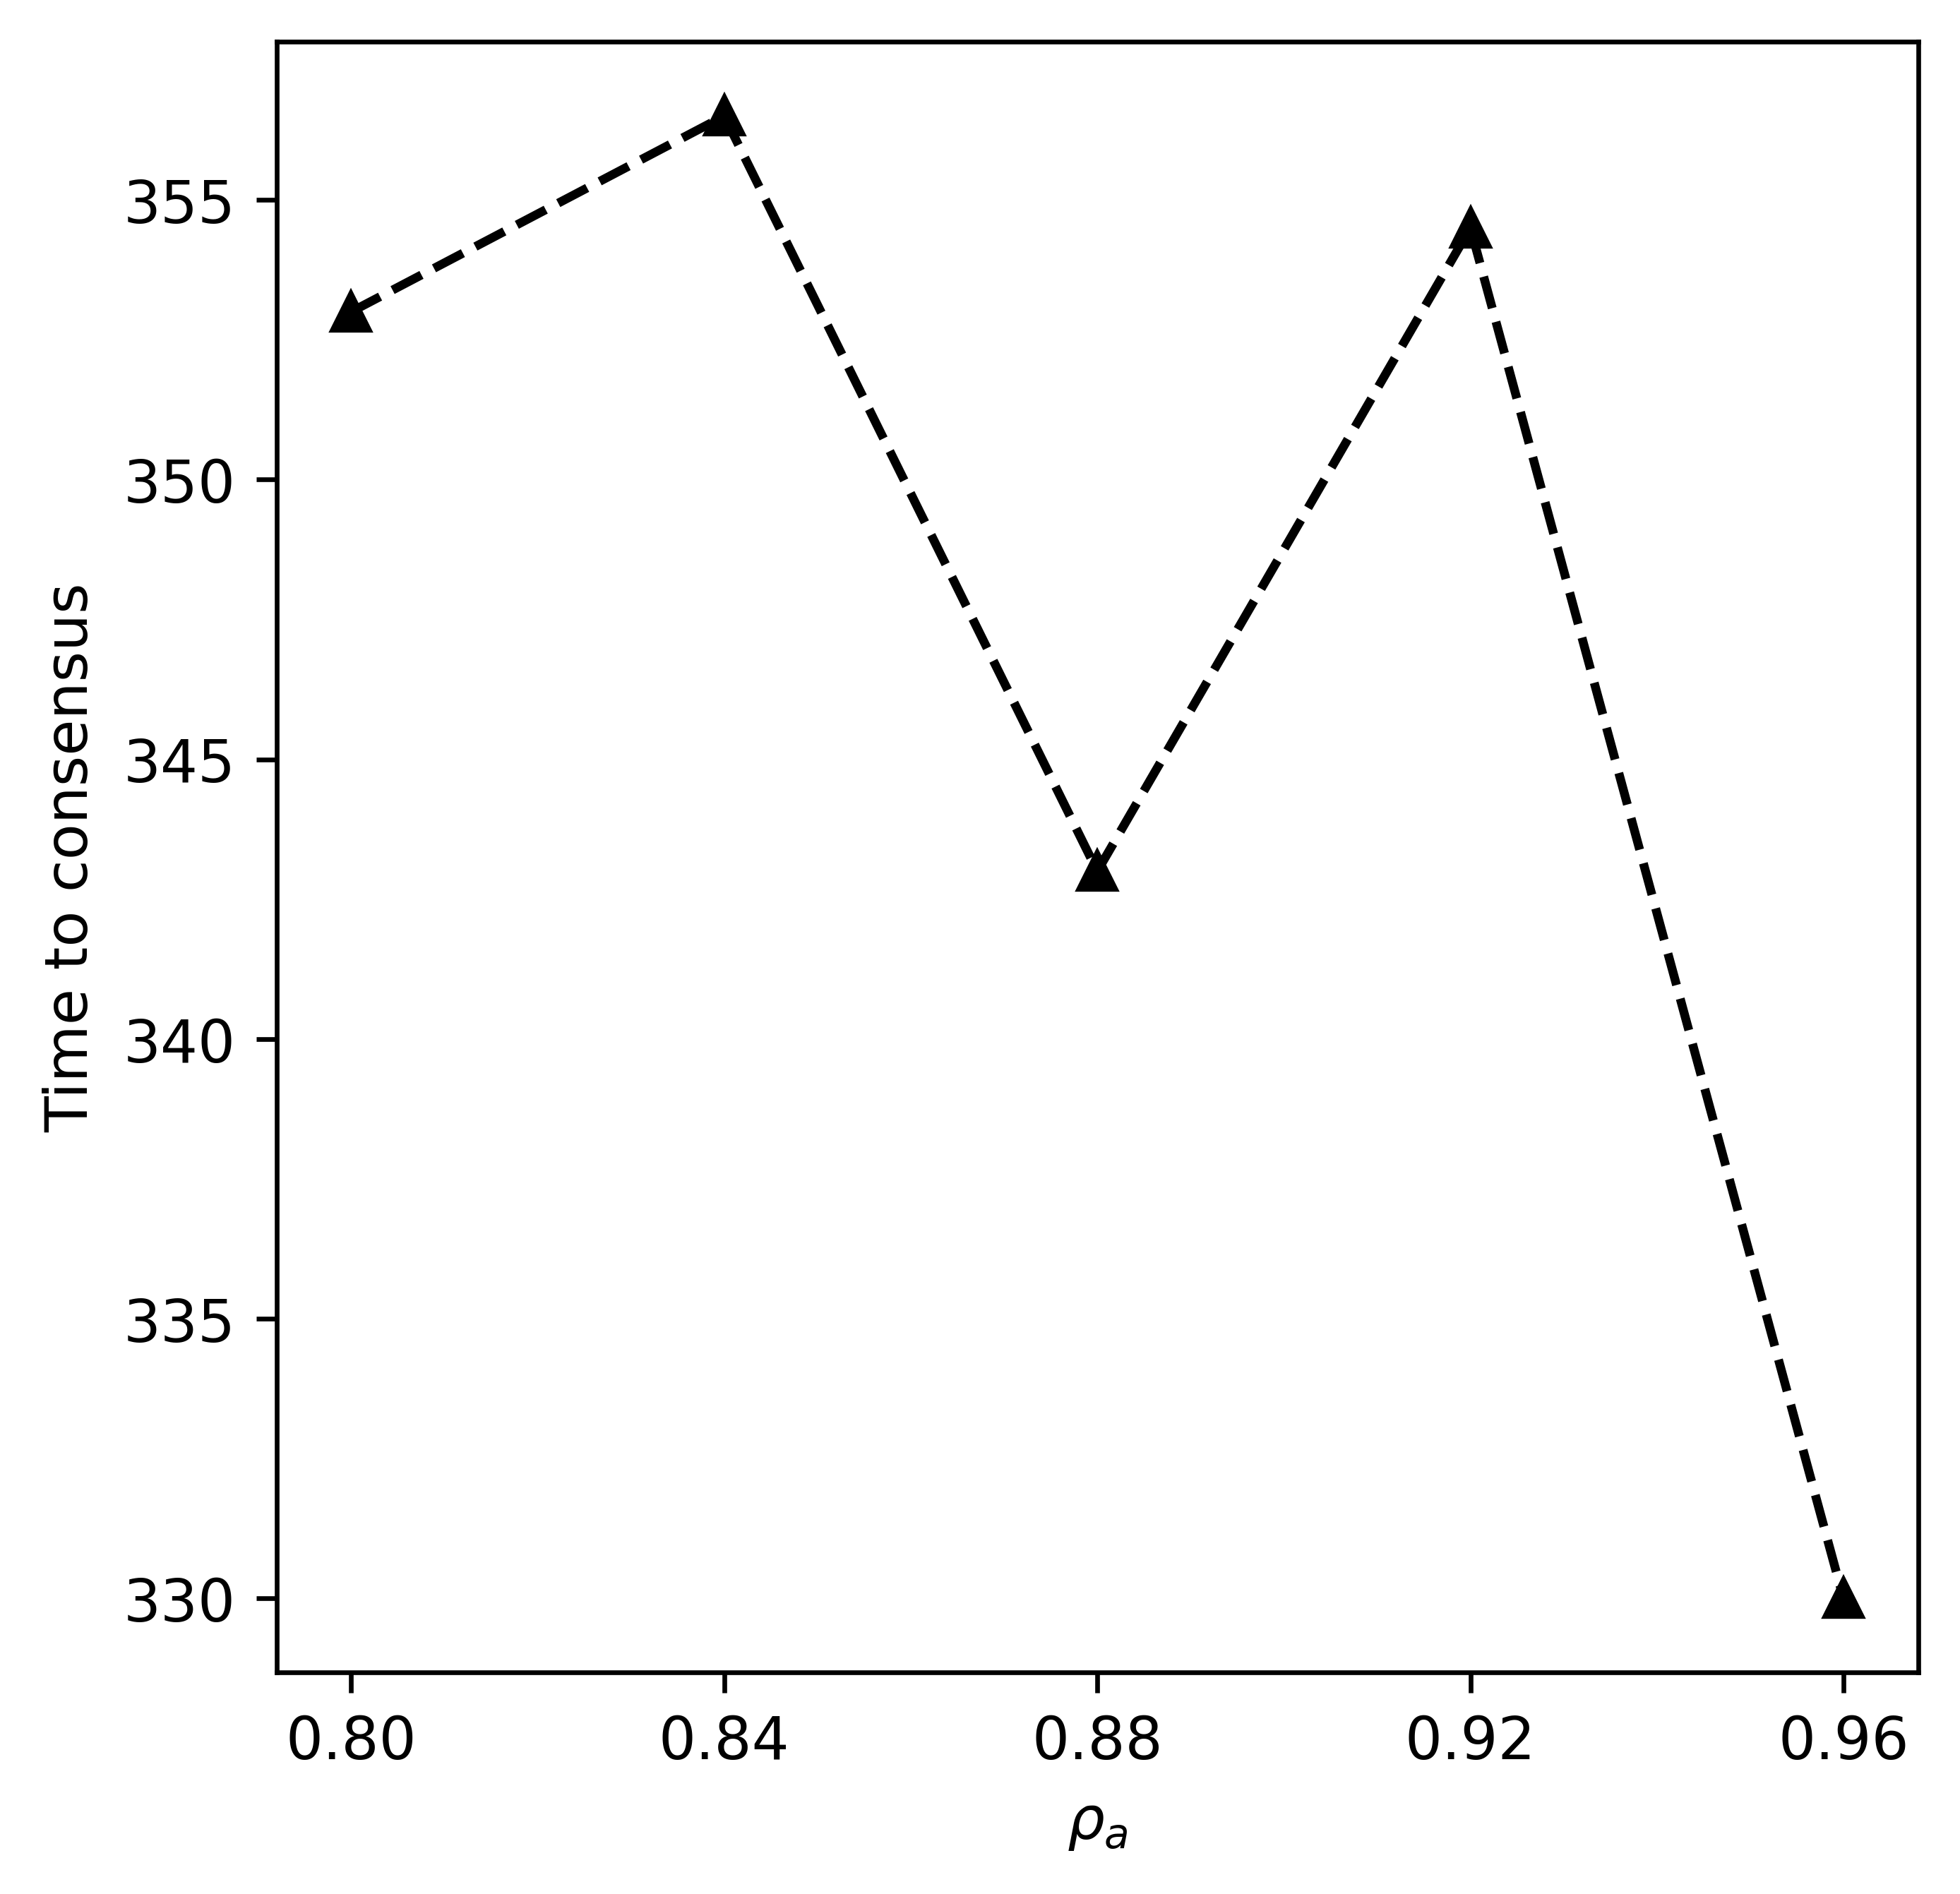

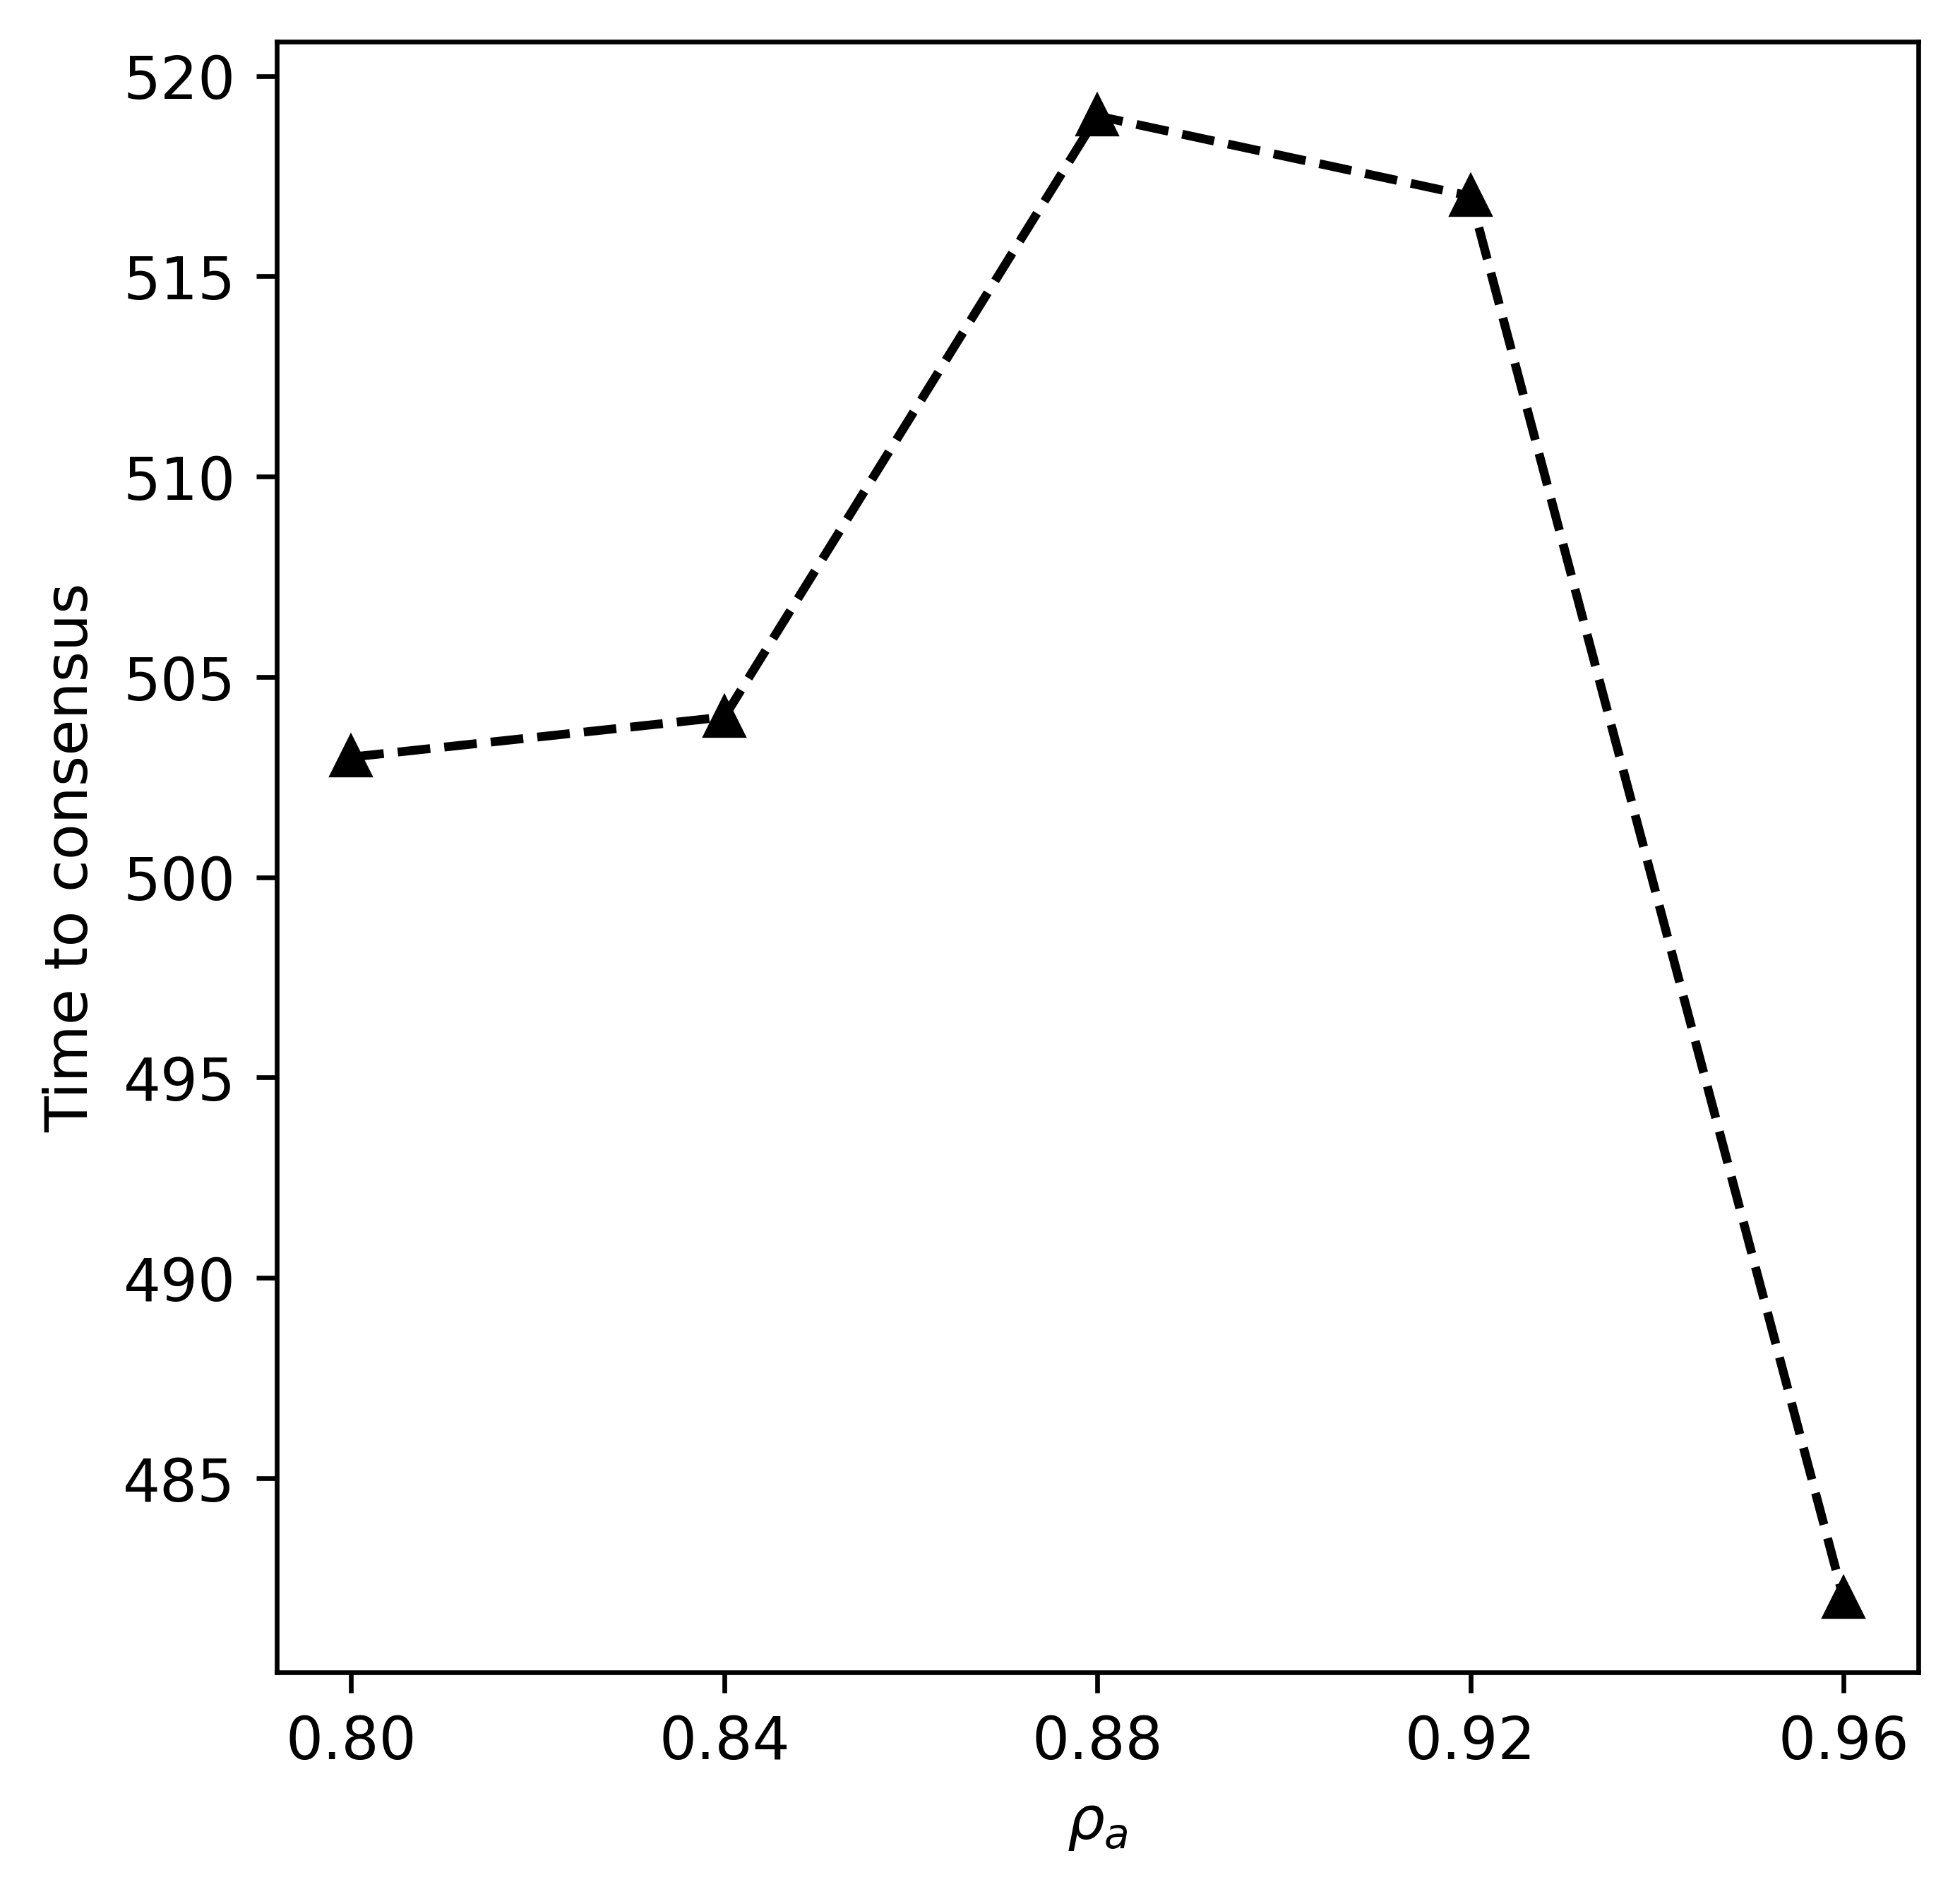

In [98]:
import matplotlib.pyplot as plt

parameters = [0.8, 0.84, 0.88, 0.92, 0.96]
sparameters = ['80', '84', '88', '92', '96']


mrkr = '--'
count=0
for strategy in ['BBots-TP-', 'Pool-TP-', 'DMMD-TP-']:
    # Set up graph
    fig, ax = plt.subplots(1,1, figsize = (5,5), dpi=600)
    ttcs = []
    for parameter in sparameters:
        time_to = np.median(Results['TTC'][strategy + parameter])
        ttcs.append(time_to)
    ax.plot(parameters, ttcs, '^', linestyle=mrkr, color='k')
    count += 1

    # Formatting
    ax.set_xticks(parameters)
    ax.set_ylabel('Time to consensus')
    ax.set_xlabel('$ρ_a$')


plt.show()

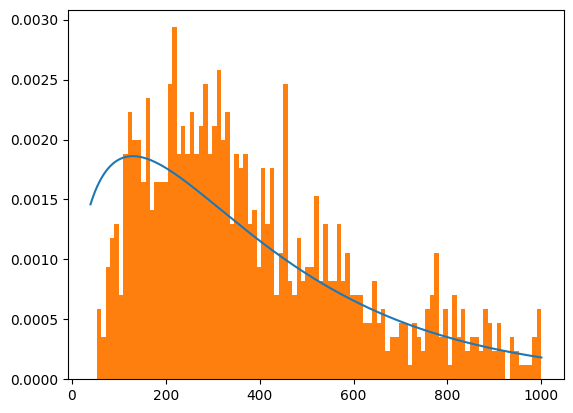

In [90]:
from scipy.stats import gamma

x = np.linspace(40, 1000, 1000)
y1 = gamma.pdf(x, a=1.5, scale=260)

#add lines for each distribution
plt.plot(x, y1)



plt.hist(Results['TTC']['Pool-TP-96'], bins=100, density=True)

plt.show()

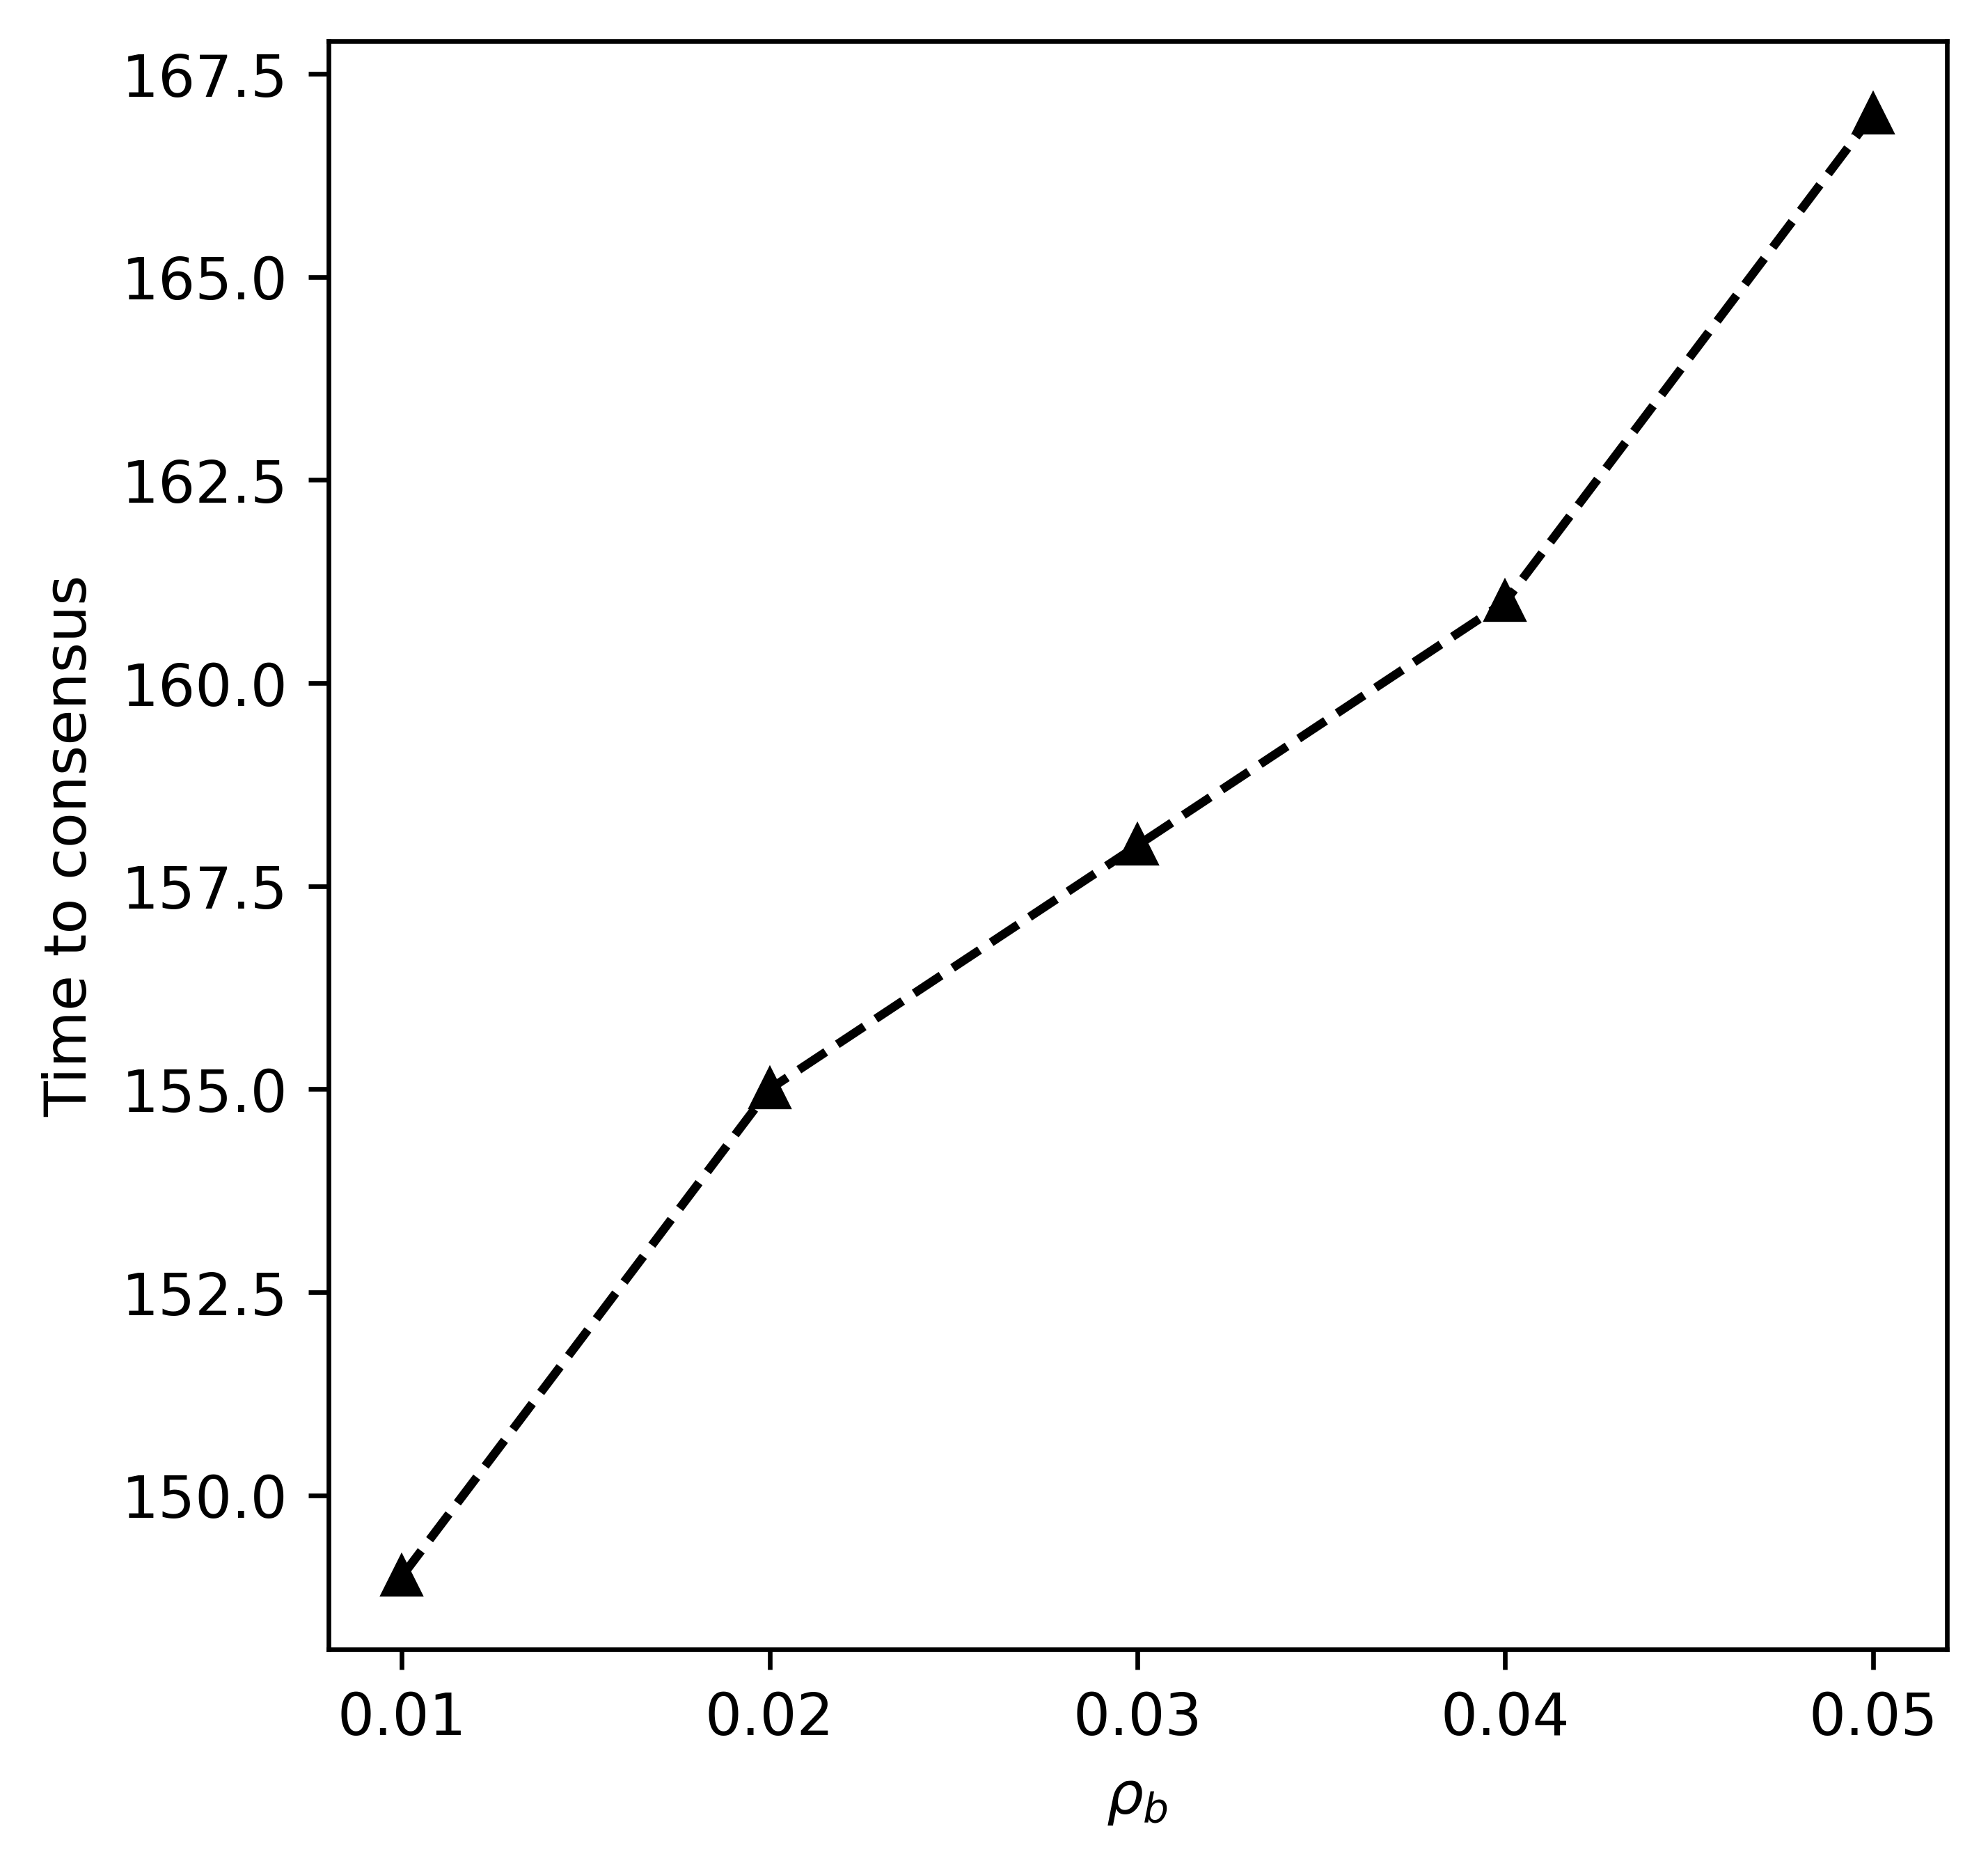

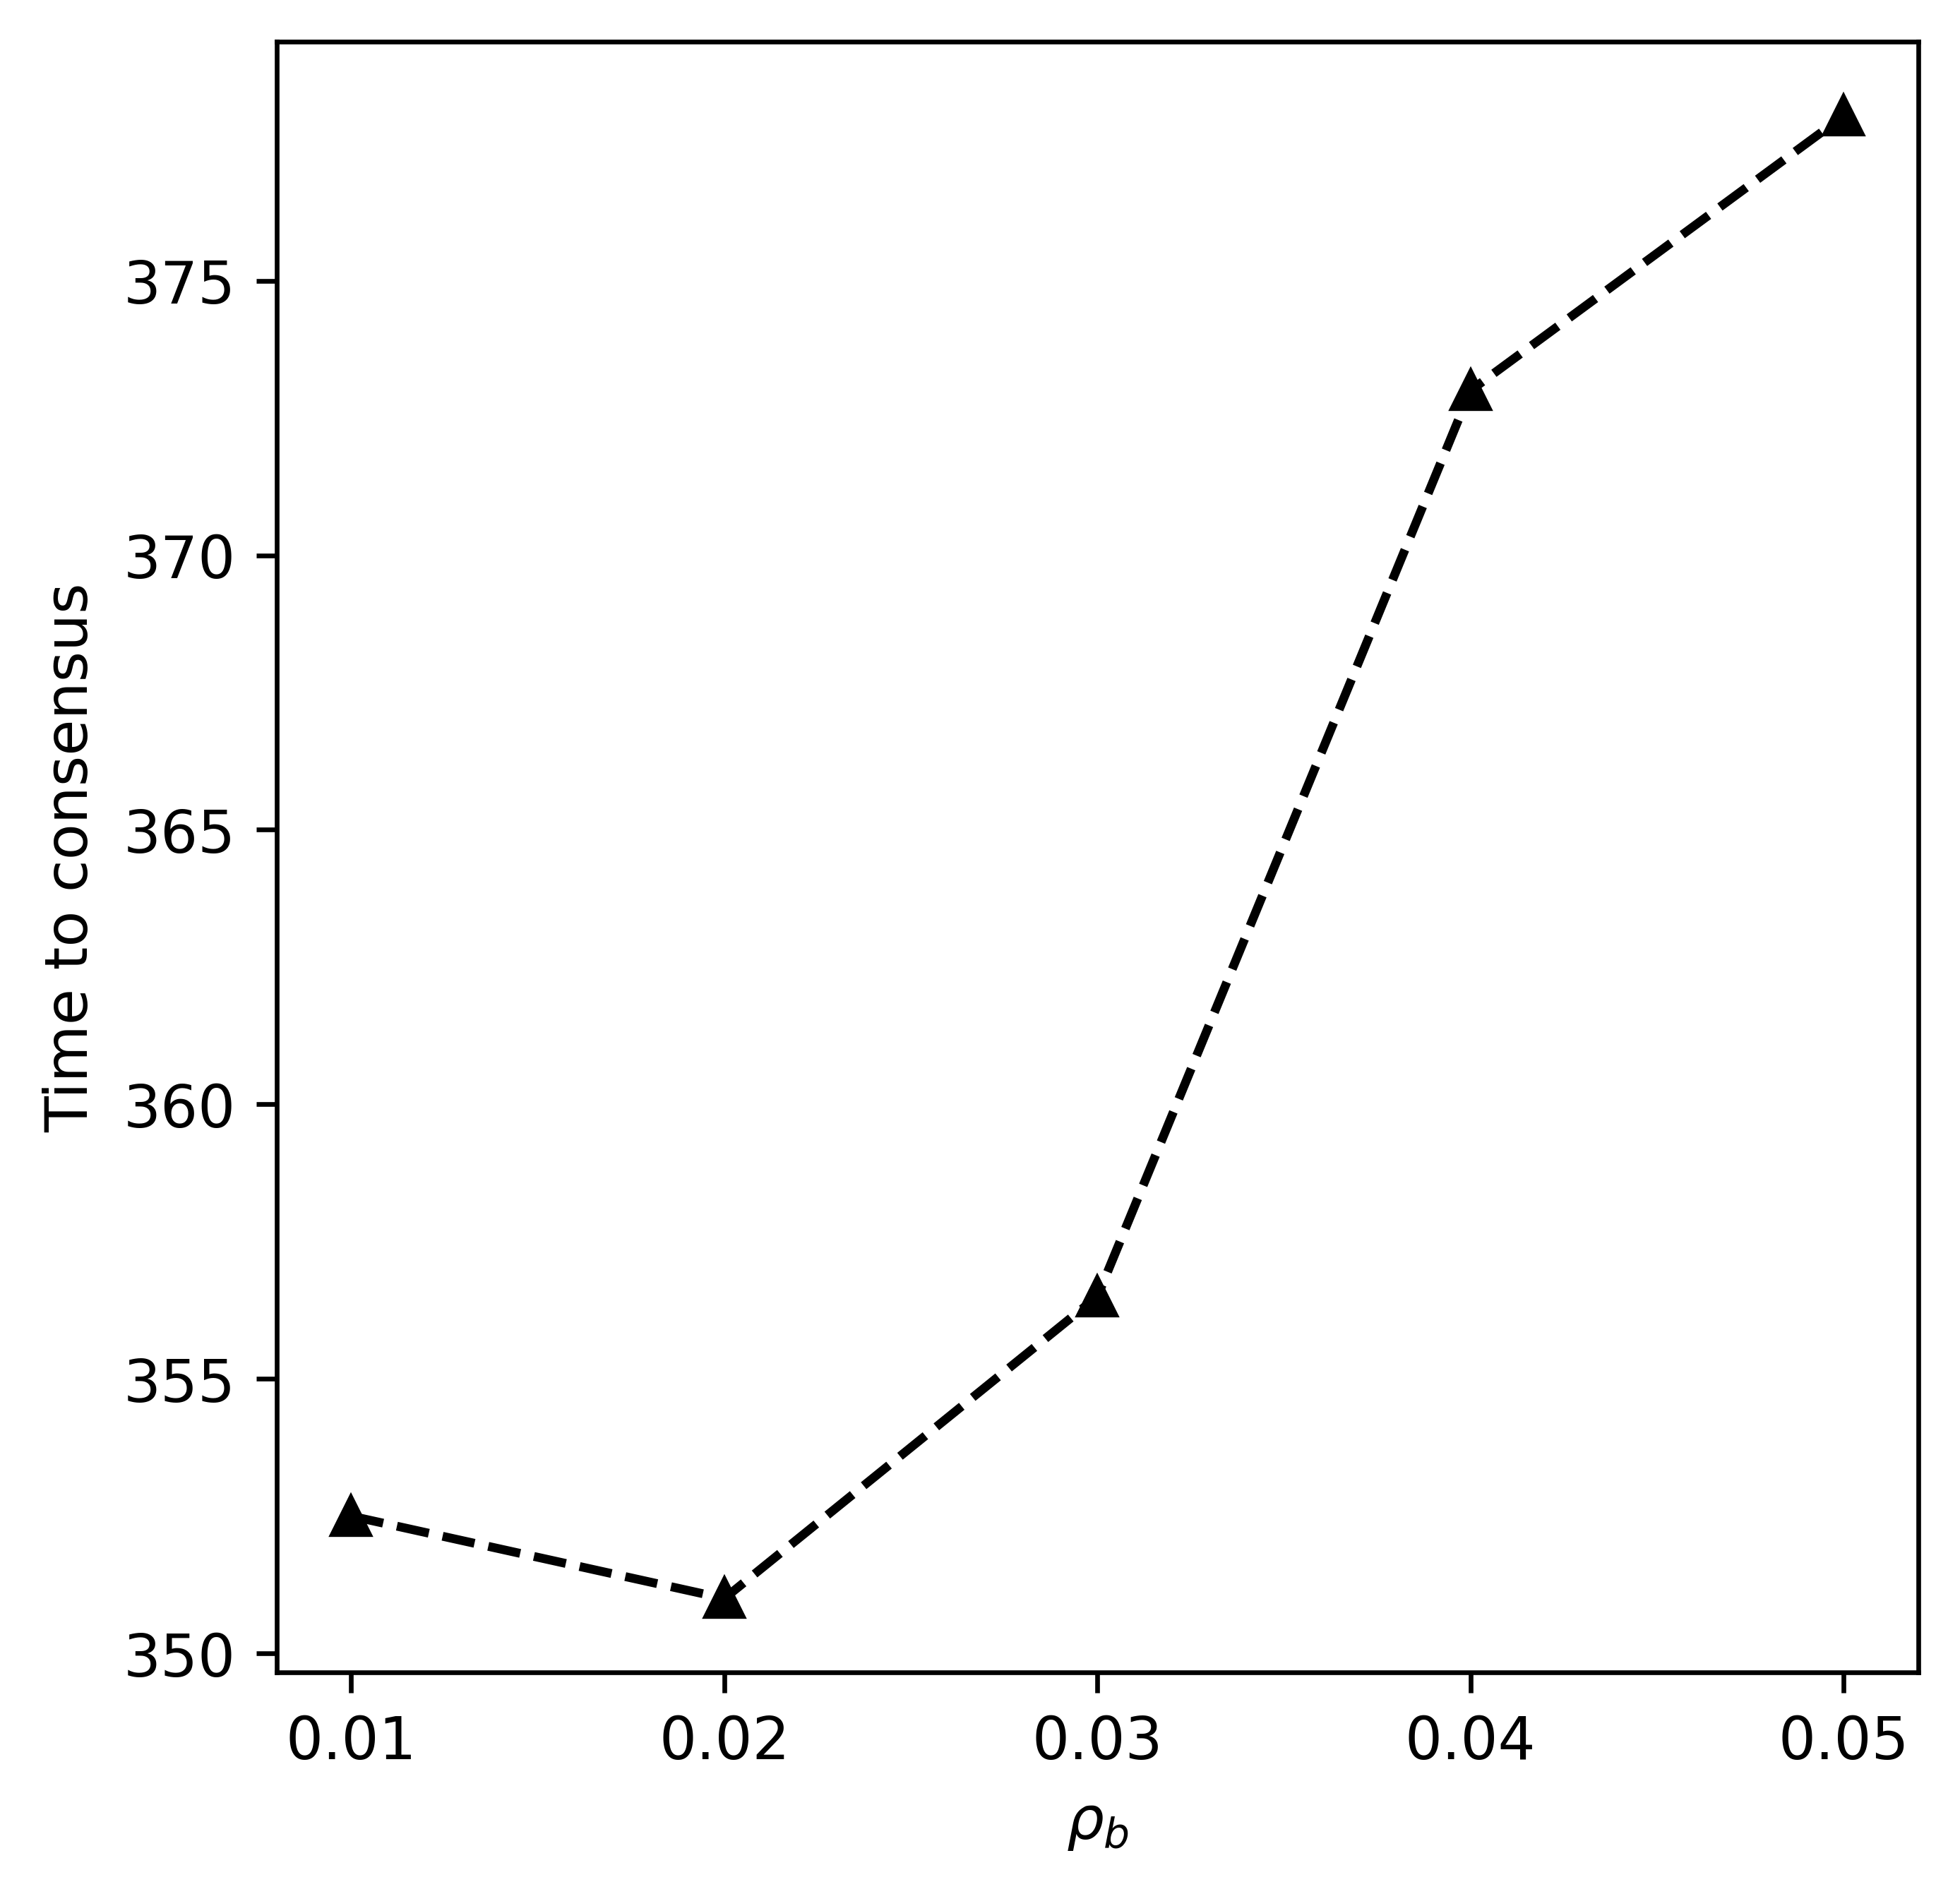

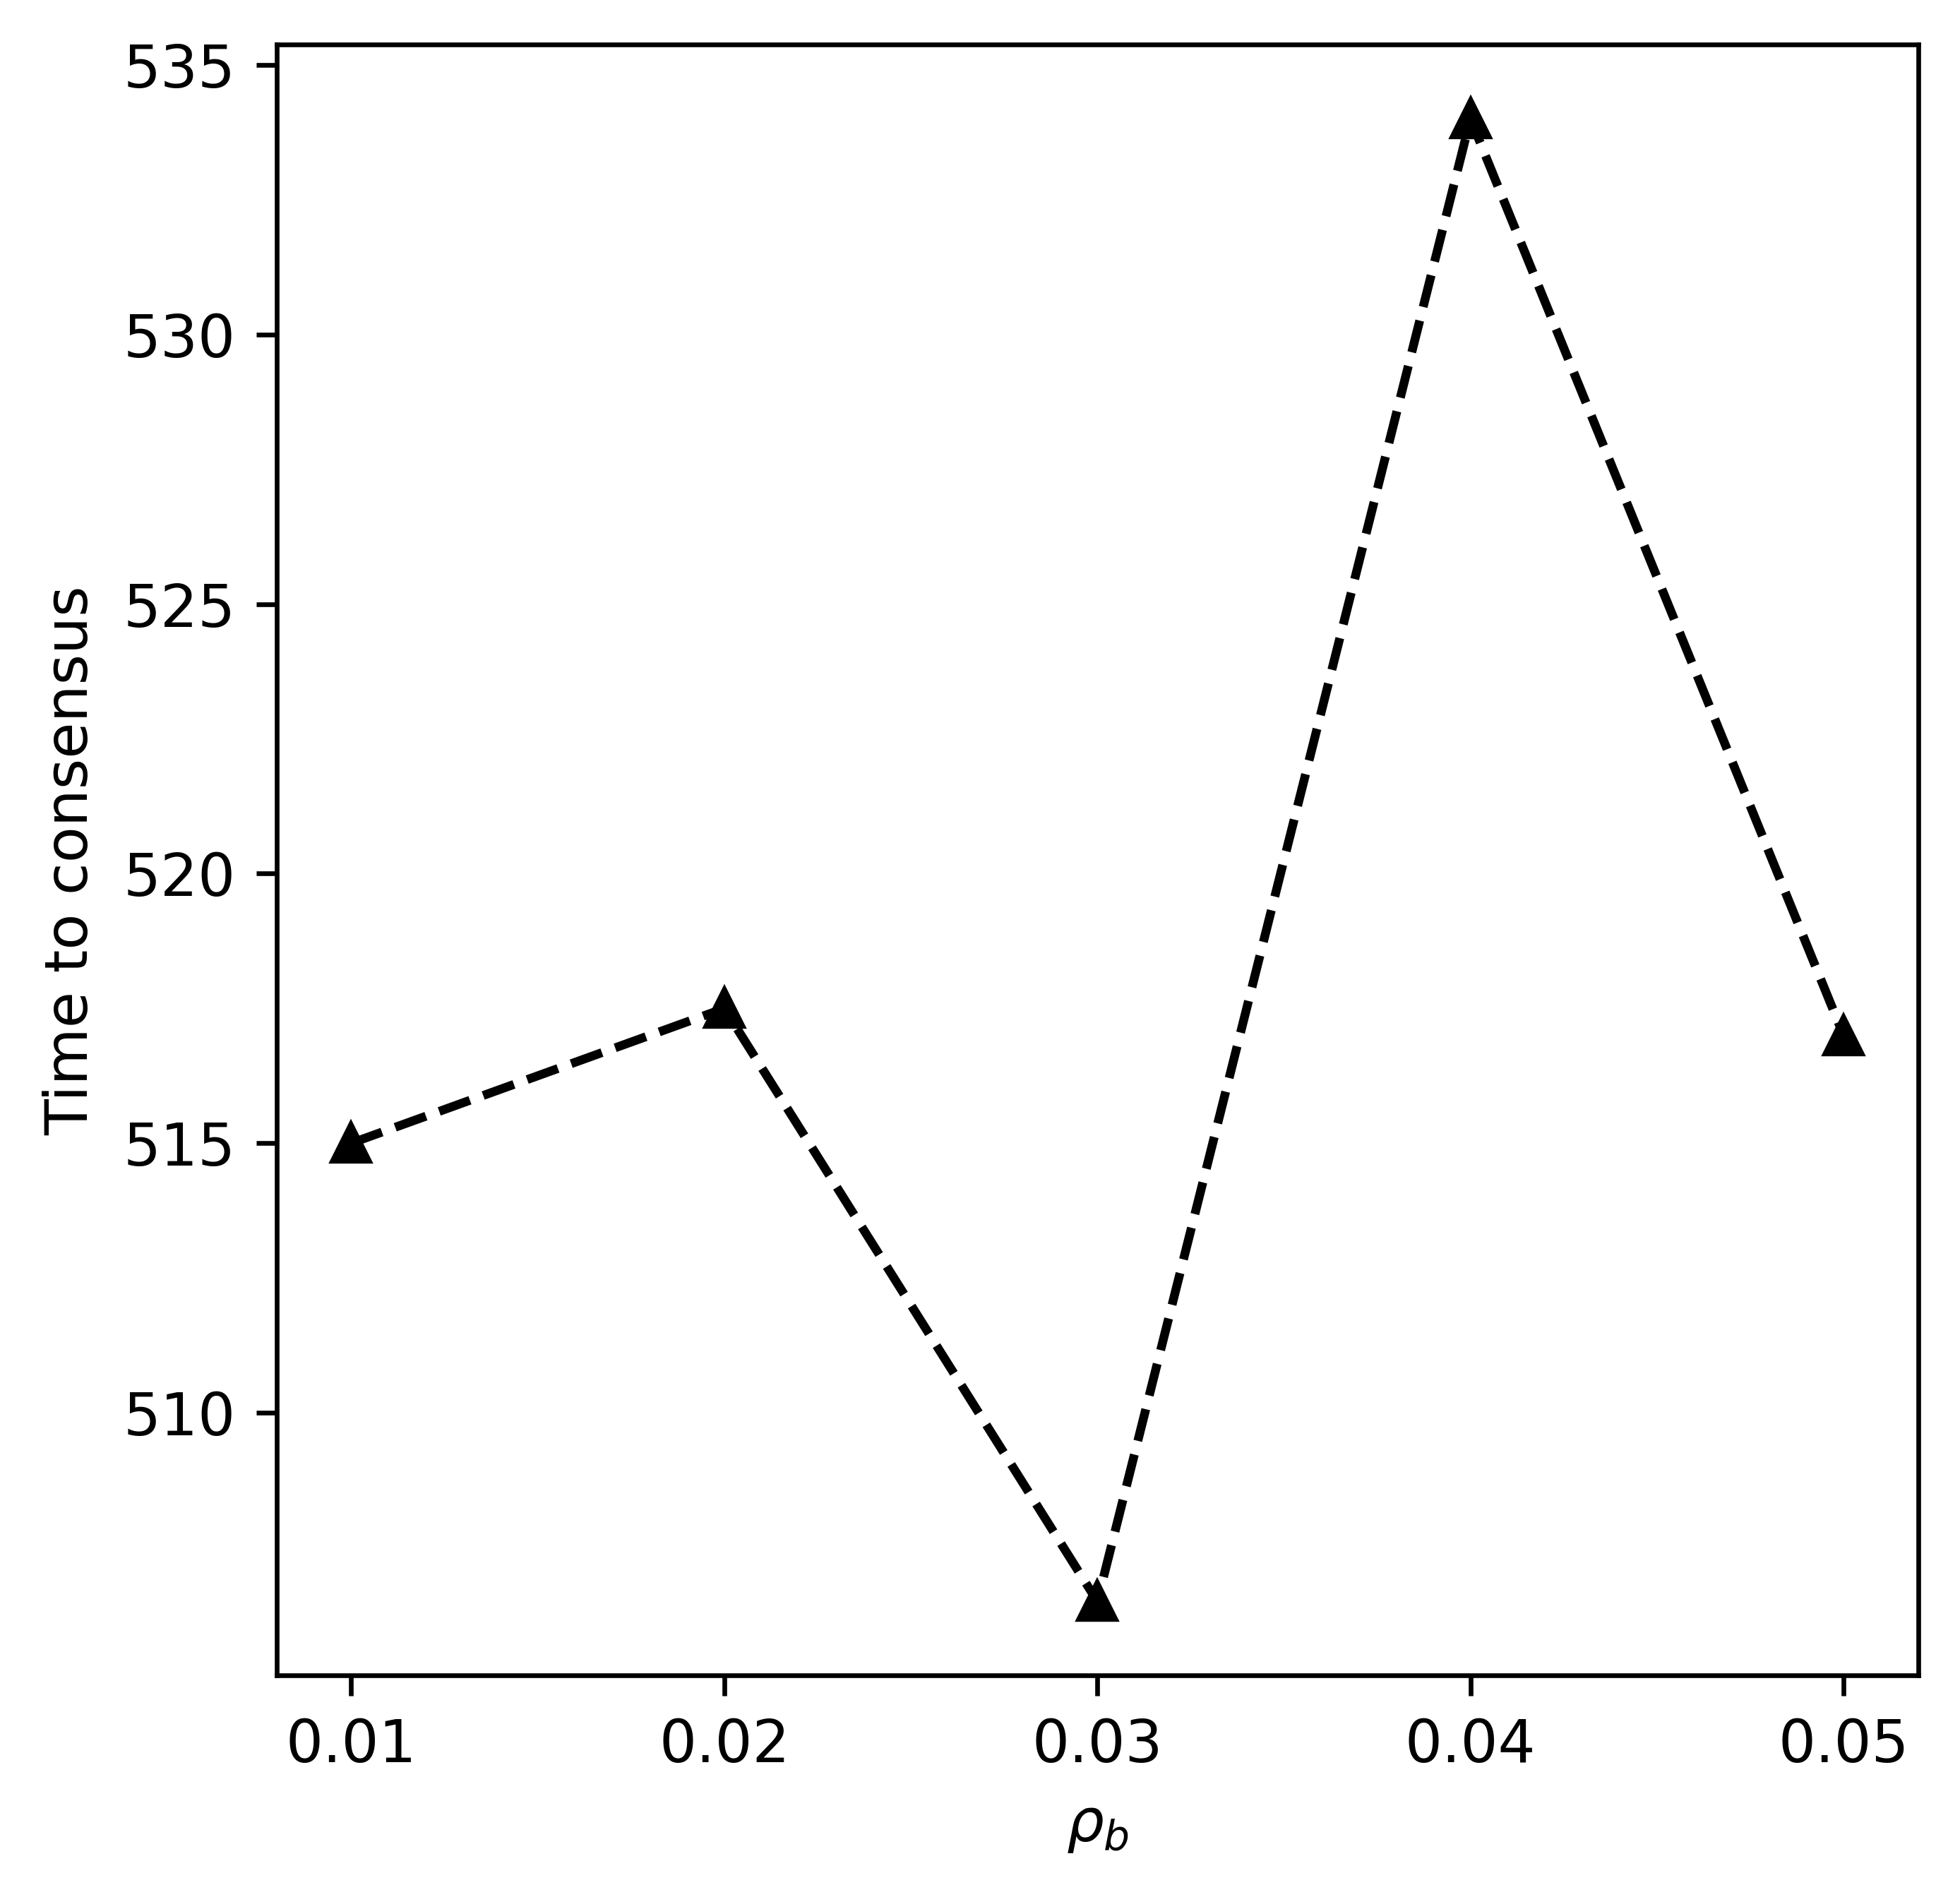

In [100]:
parameters = [0.01, 0.02, 0.03, 0.04, 0.05]
sparameters = ['1', '2', '3', '4', '5']


mrkr = '--'
count=0
for strategy in ['BBots-FP-', 'Pool-FP-', 'DMMD-FP-']:
    # Set up graph
    fig, ax = plt.subplots(1,1, figsize = (5,5), dpi=600)
    ttcs = []
    for parameter in sparameters:
        time_to = np.median(Results['TTC'][strategy + parameter])
        ttcs.append(time_to)
    ax.plot(parameters, ttcs, '^', linestyle=mrkr, color='k')
    count += 1

    # Formatting
    ax.set_xticks(parameters)
    ax.set_ylabel('Time to consensus')
    ax.set_xlabel('$ρ_b$')


plt.show()

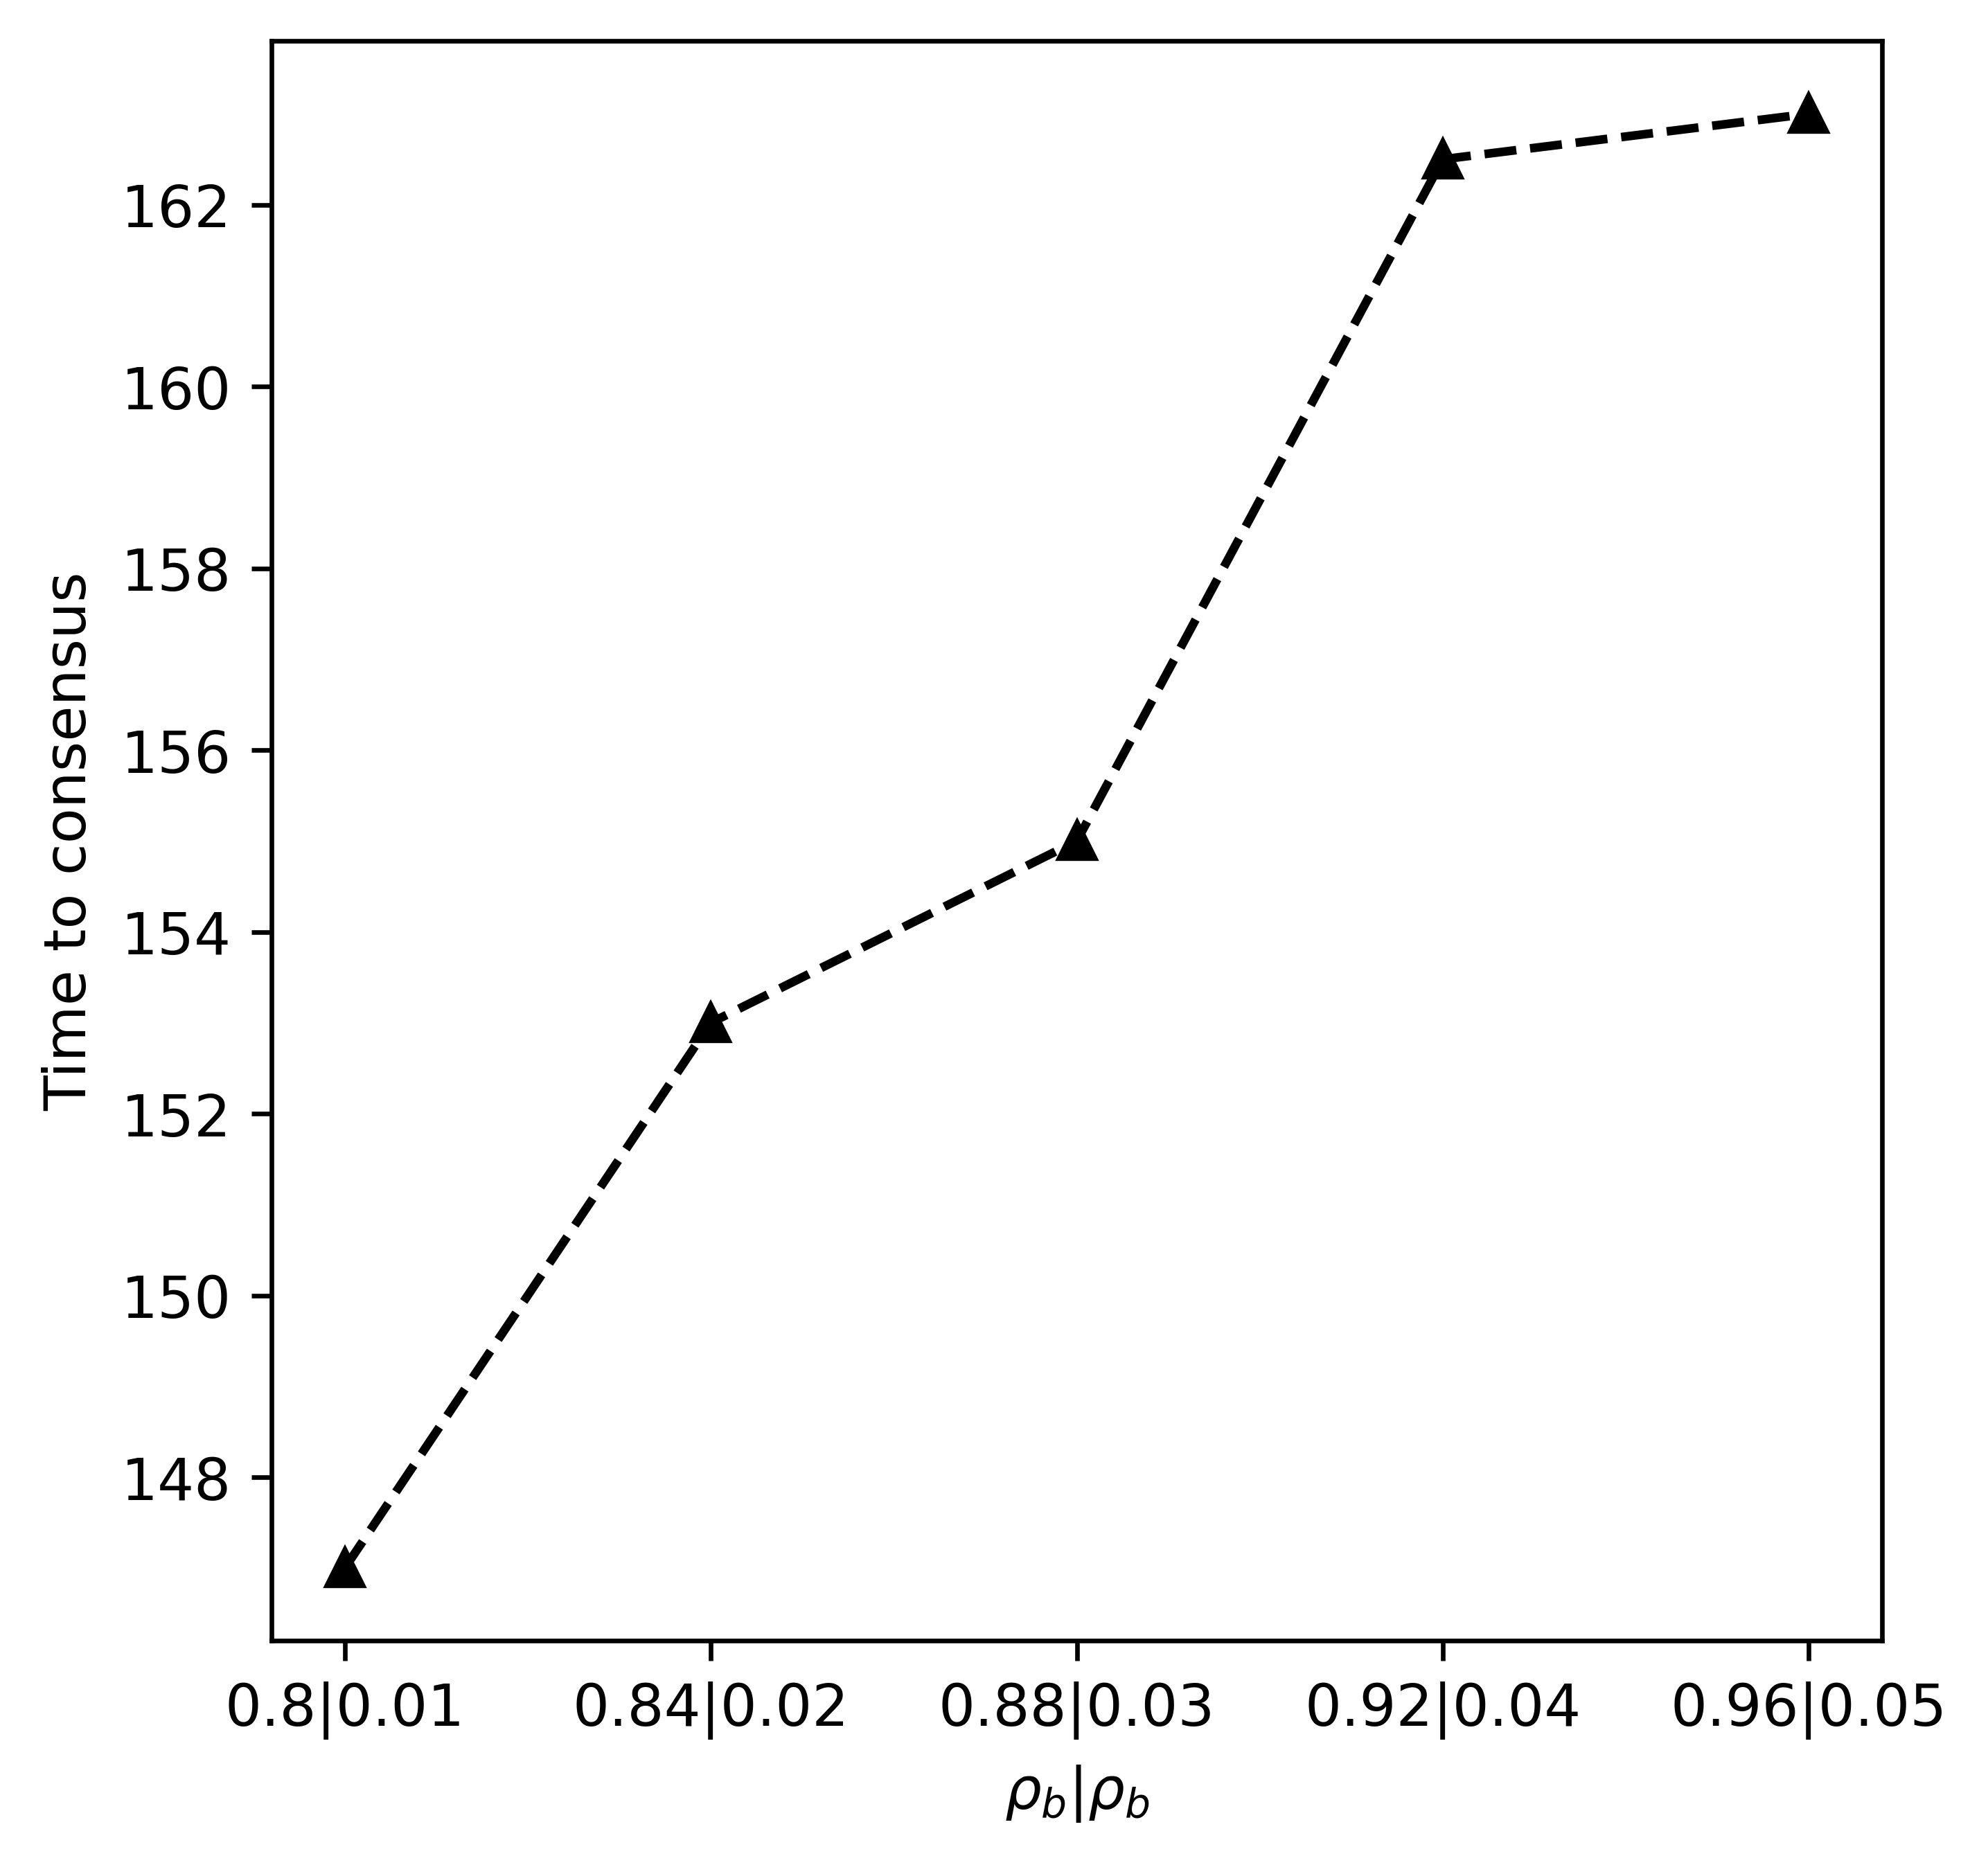

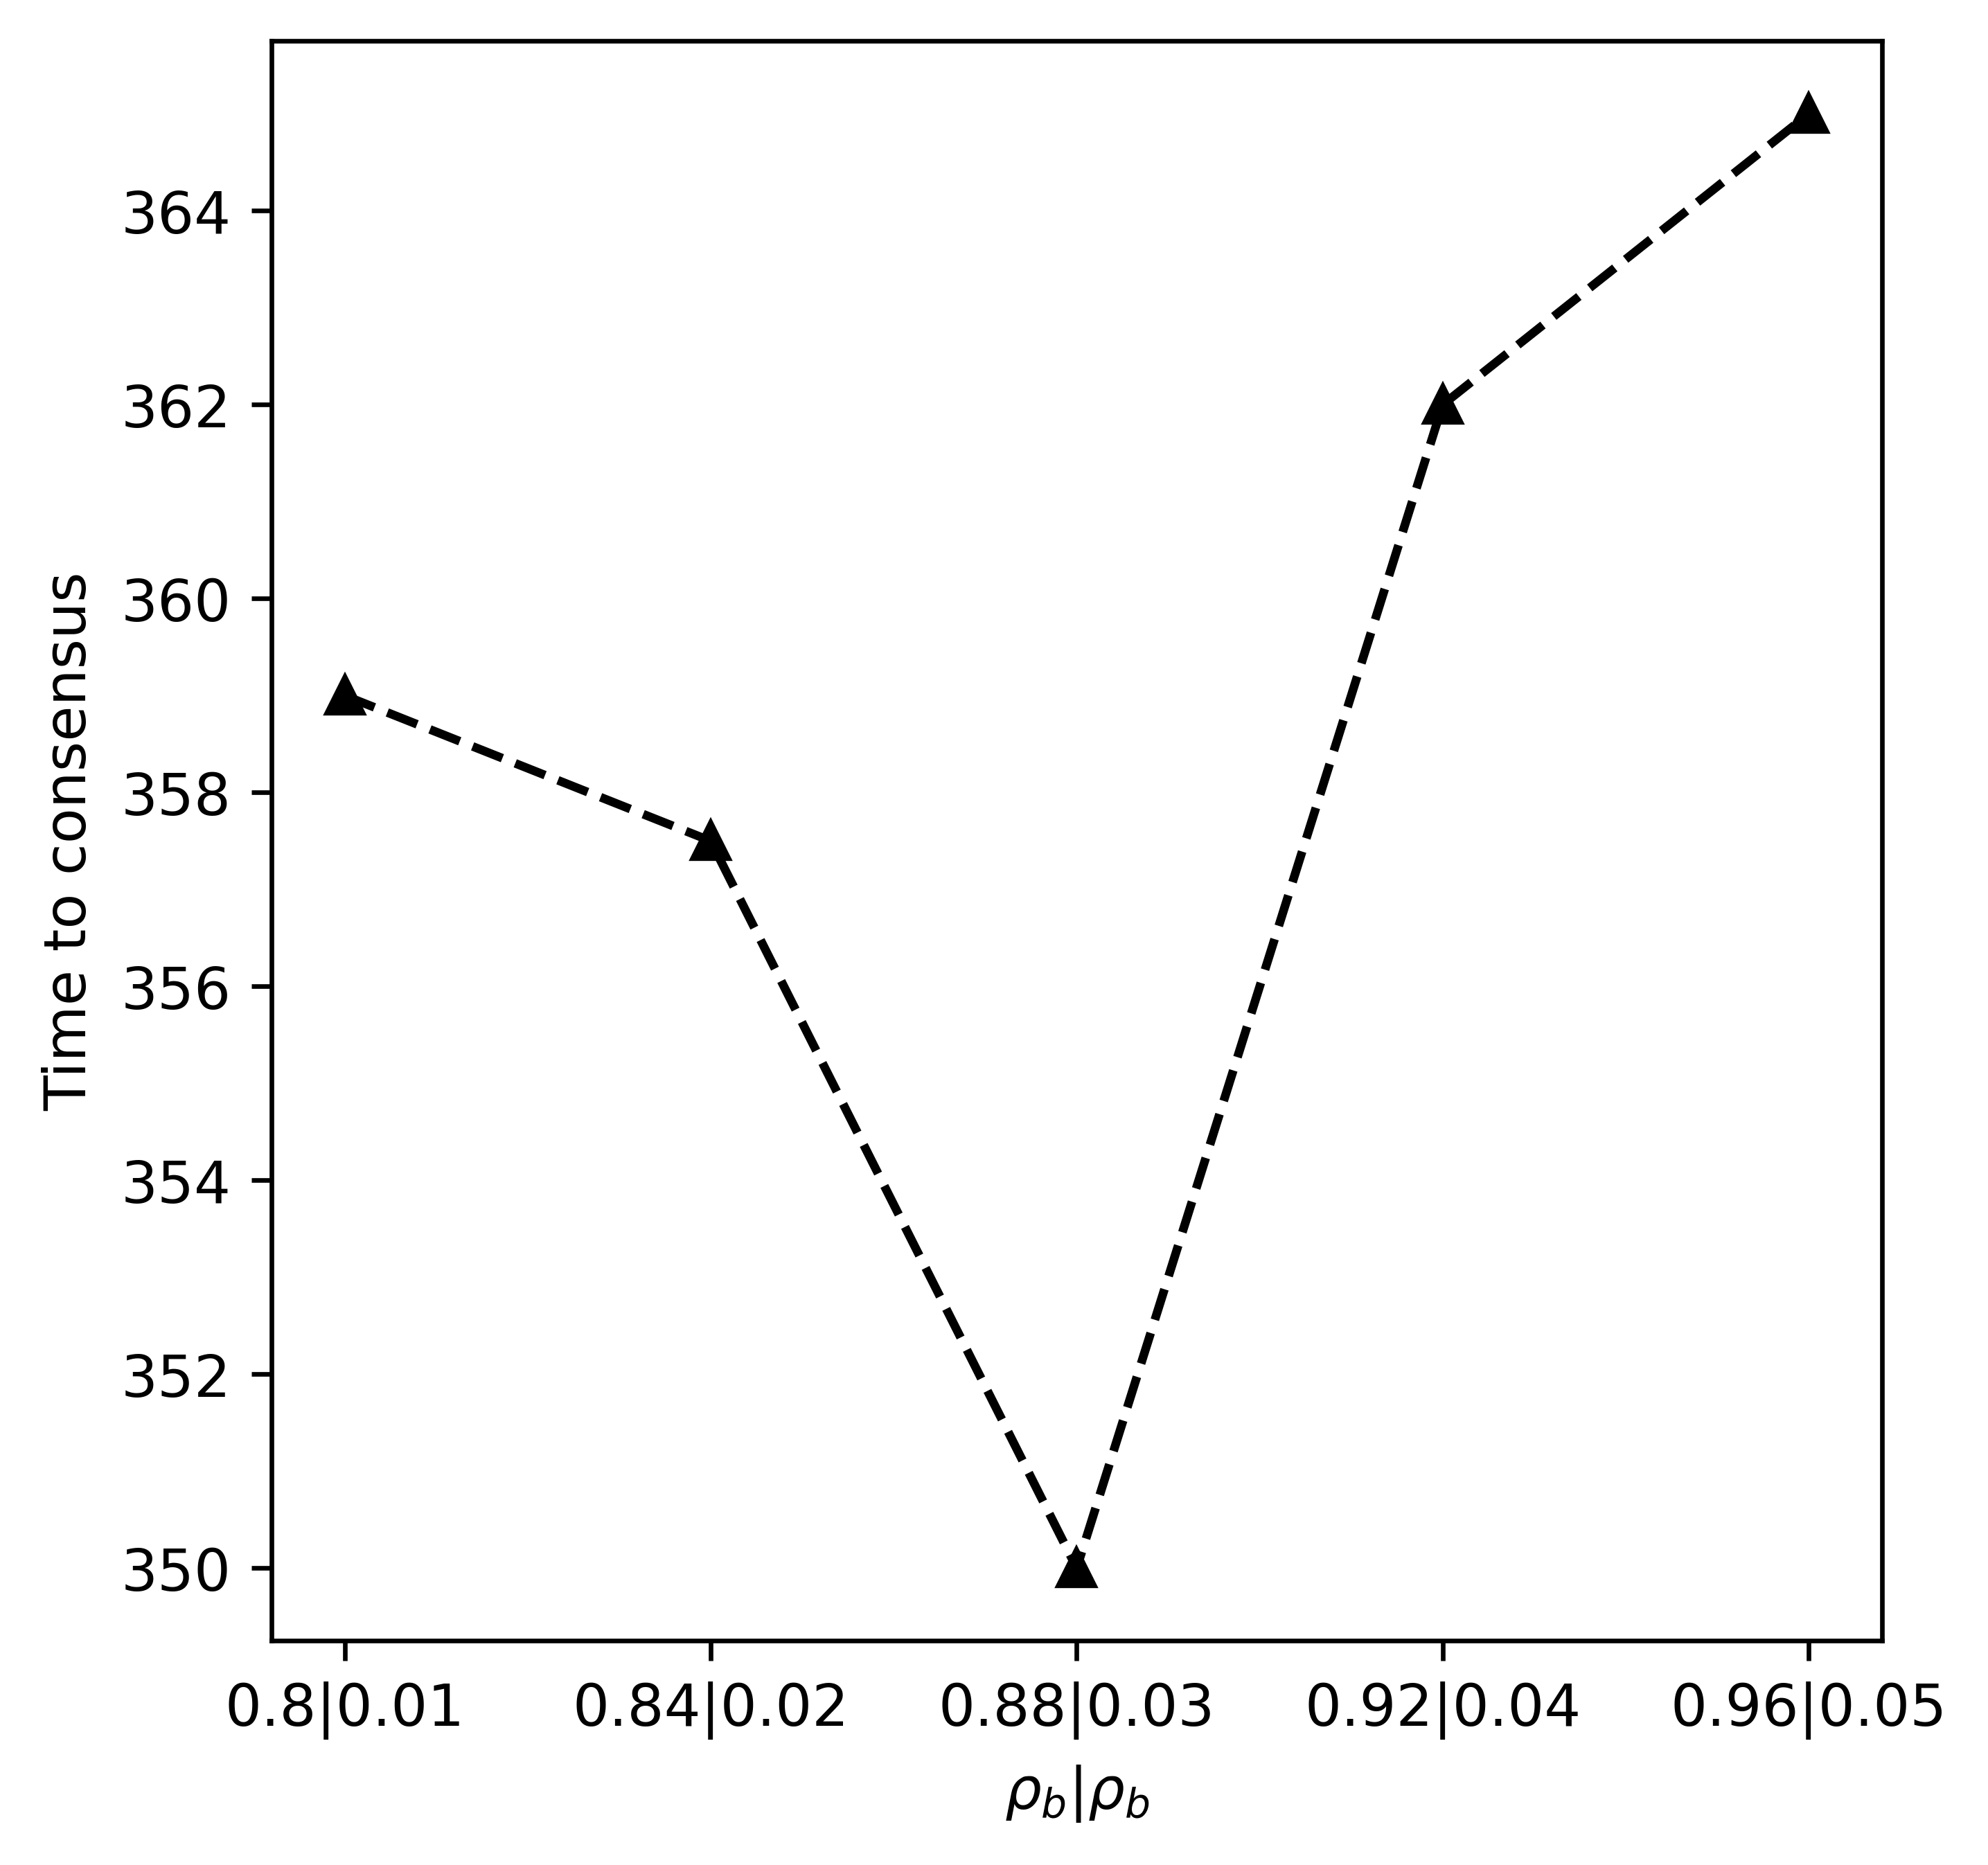

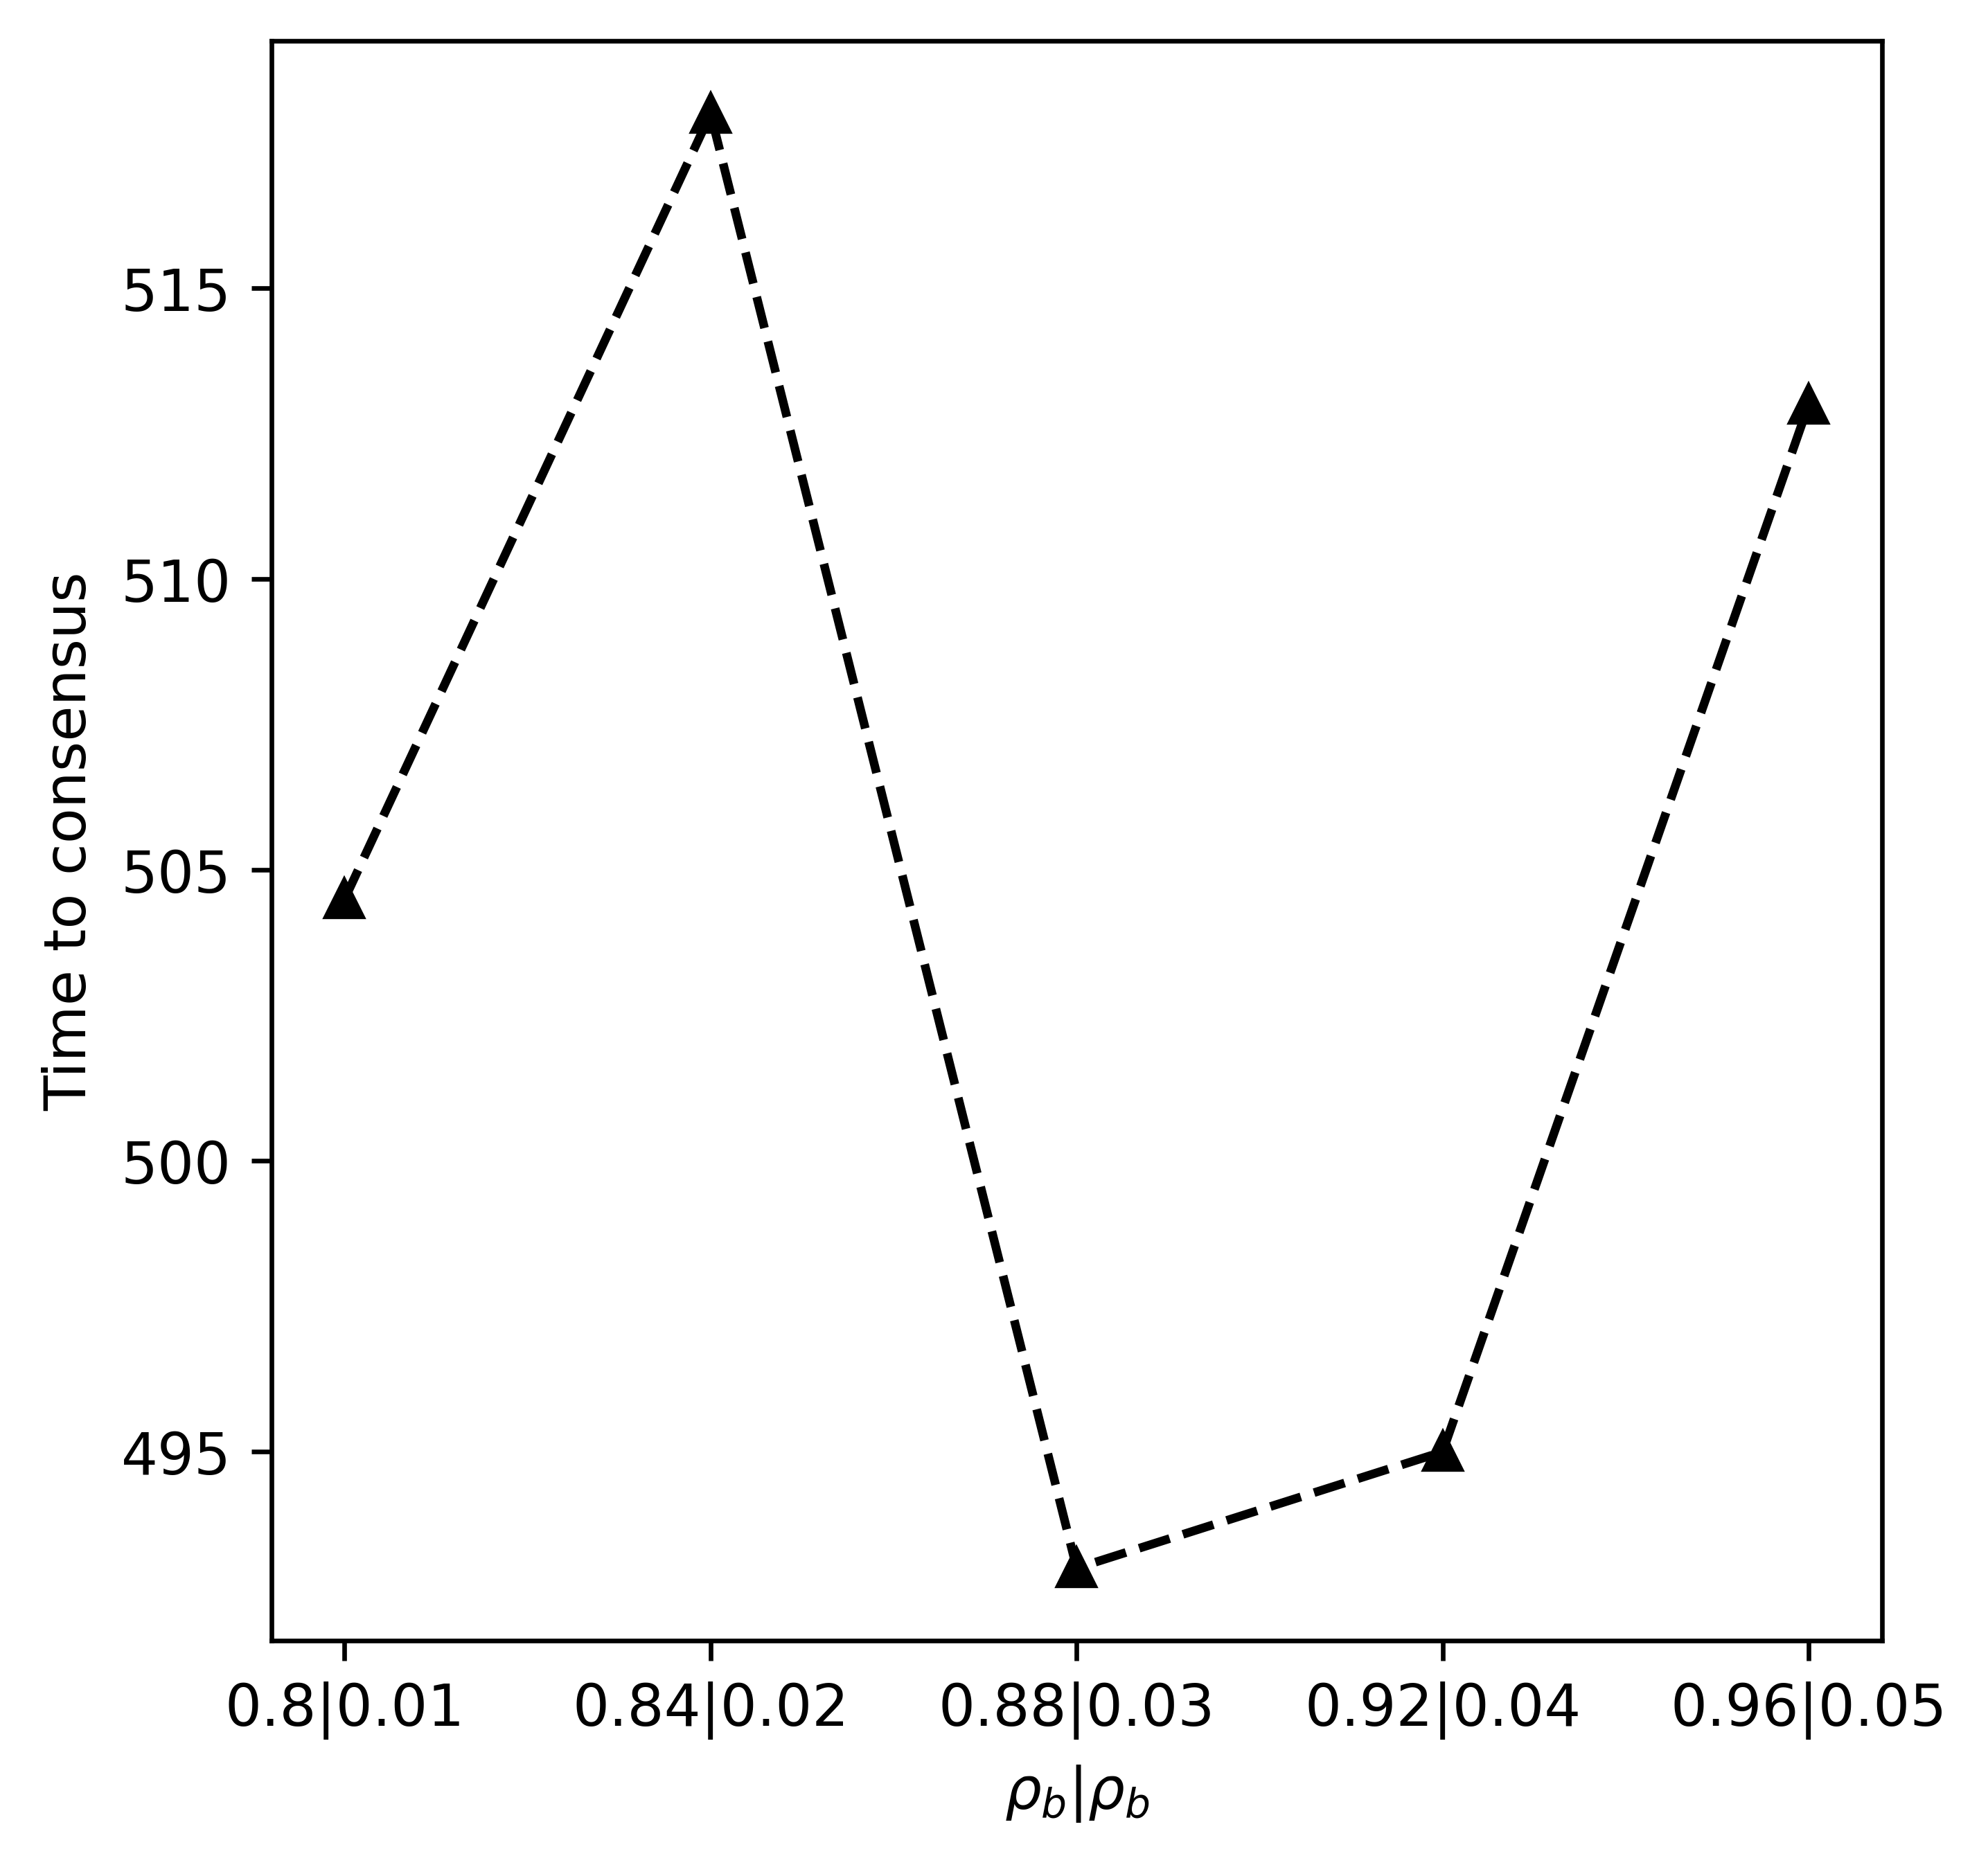

In [101]:
import matplotlib.pyplot as plt

parameters = [0.01, 0.02, 0.03, 0.04, 0.05]
sparameters = ['80-1', '84-2', '88-3', '92-4', '96-5']

mrkr = '--'
count=0
for strategy in ['BBots-', 'Pool-', 'DMMD-']:
    # Set up graph
    fig, ax = plt.subplots(1,1, figsize = (5,5), dpi=600)
    ttcs = []
    for parameter in sparameters:
        time_to = np.median(Results['TTC'][strategy + parameter])
        ttcs.append(time_to)
    ax.plot(parameters, ttcs, '^', linestyle=mrkr, color='k')
    count += 1

    ax.set_xticks(parameters)
    ax.set_xticklabels(['0.8|0.01', '0.84|0.02', '0.88|0.03', '0.92|0.04', '0.96|0.05'])

    # Formatting
    ax.set_ylabel('Time to consensus')
    ax.set_xlabel('$ρ_b | ρ_b$')


plt.show()

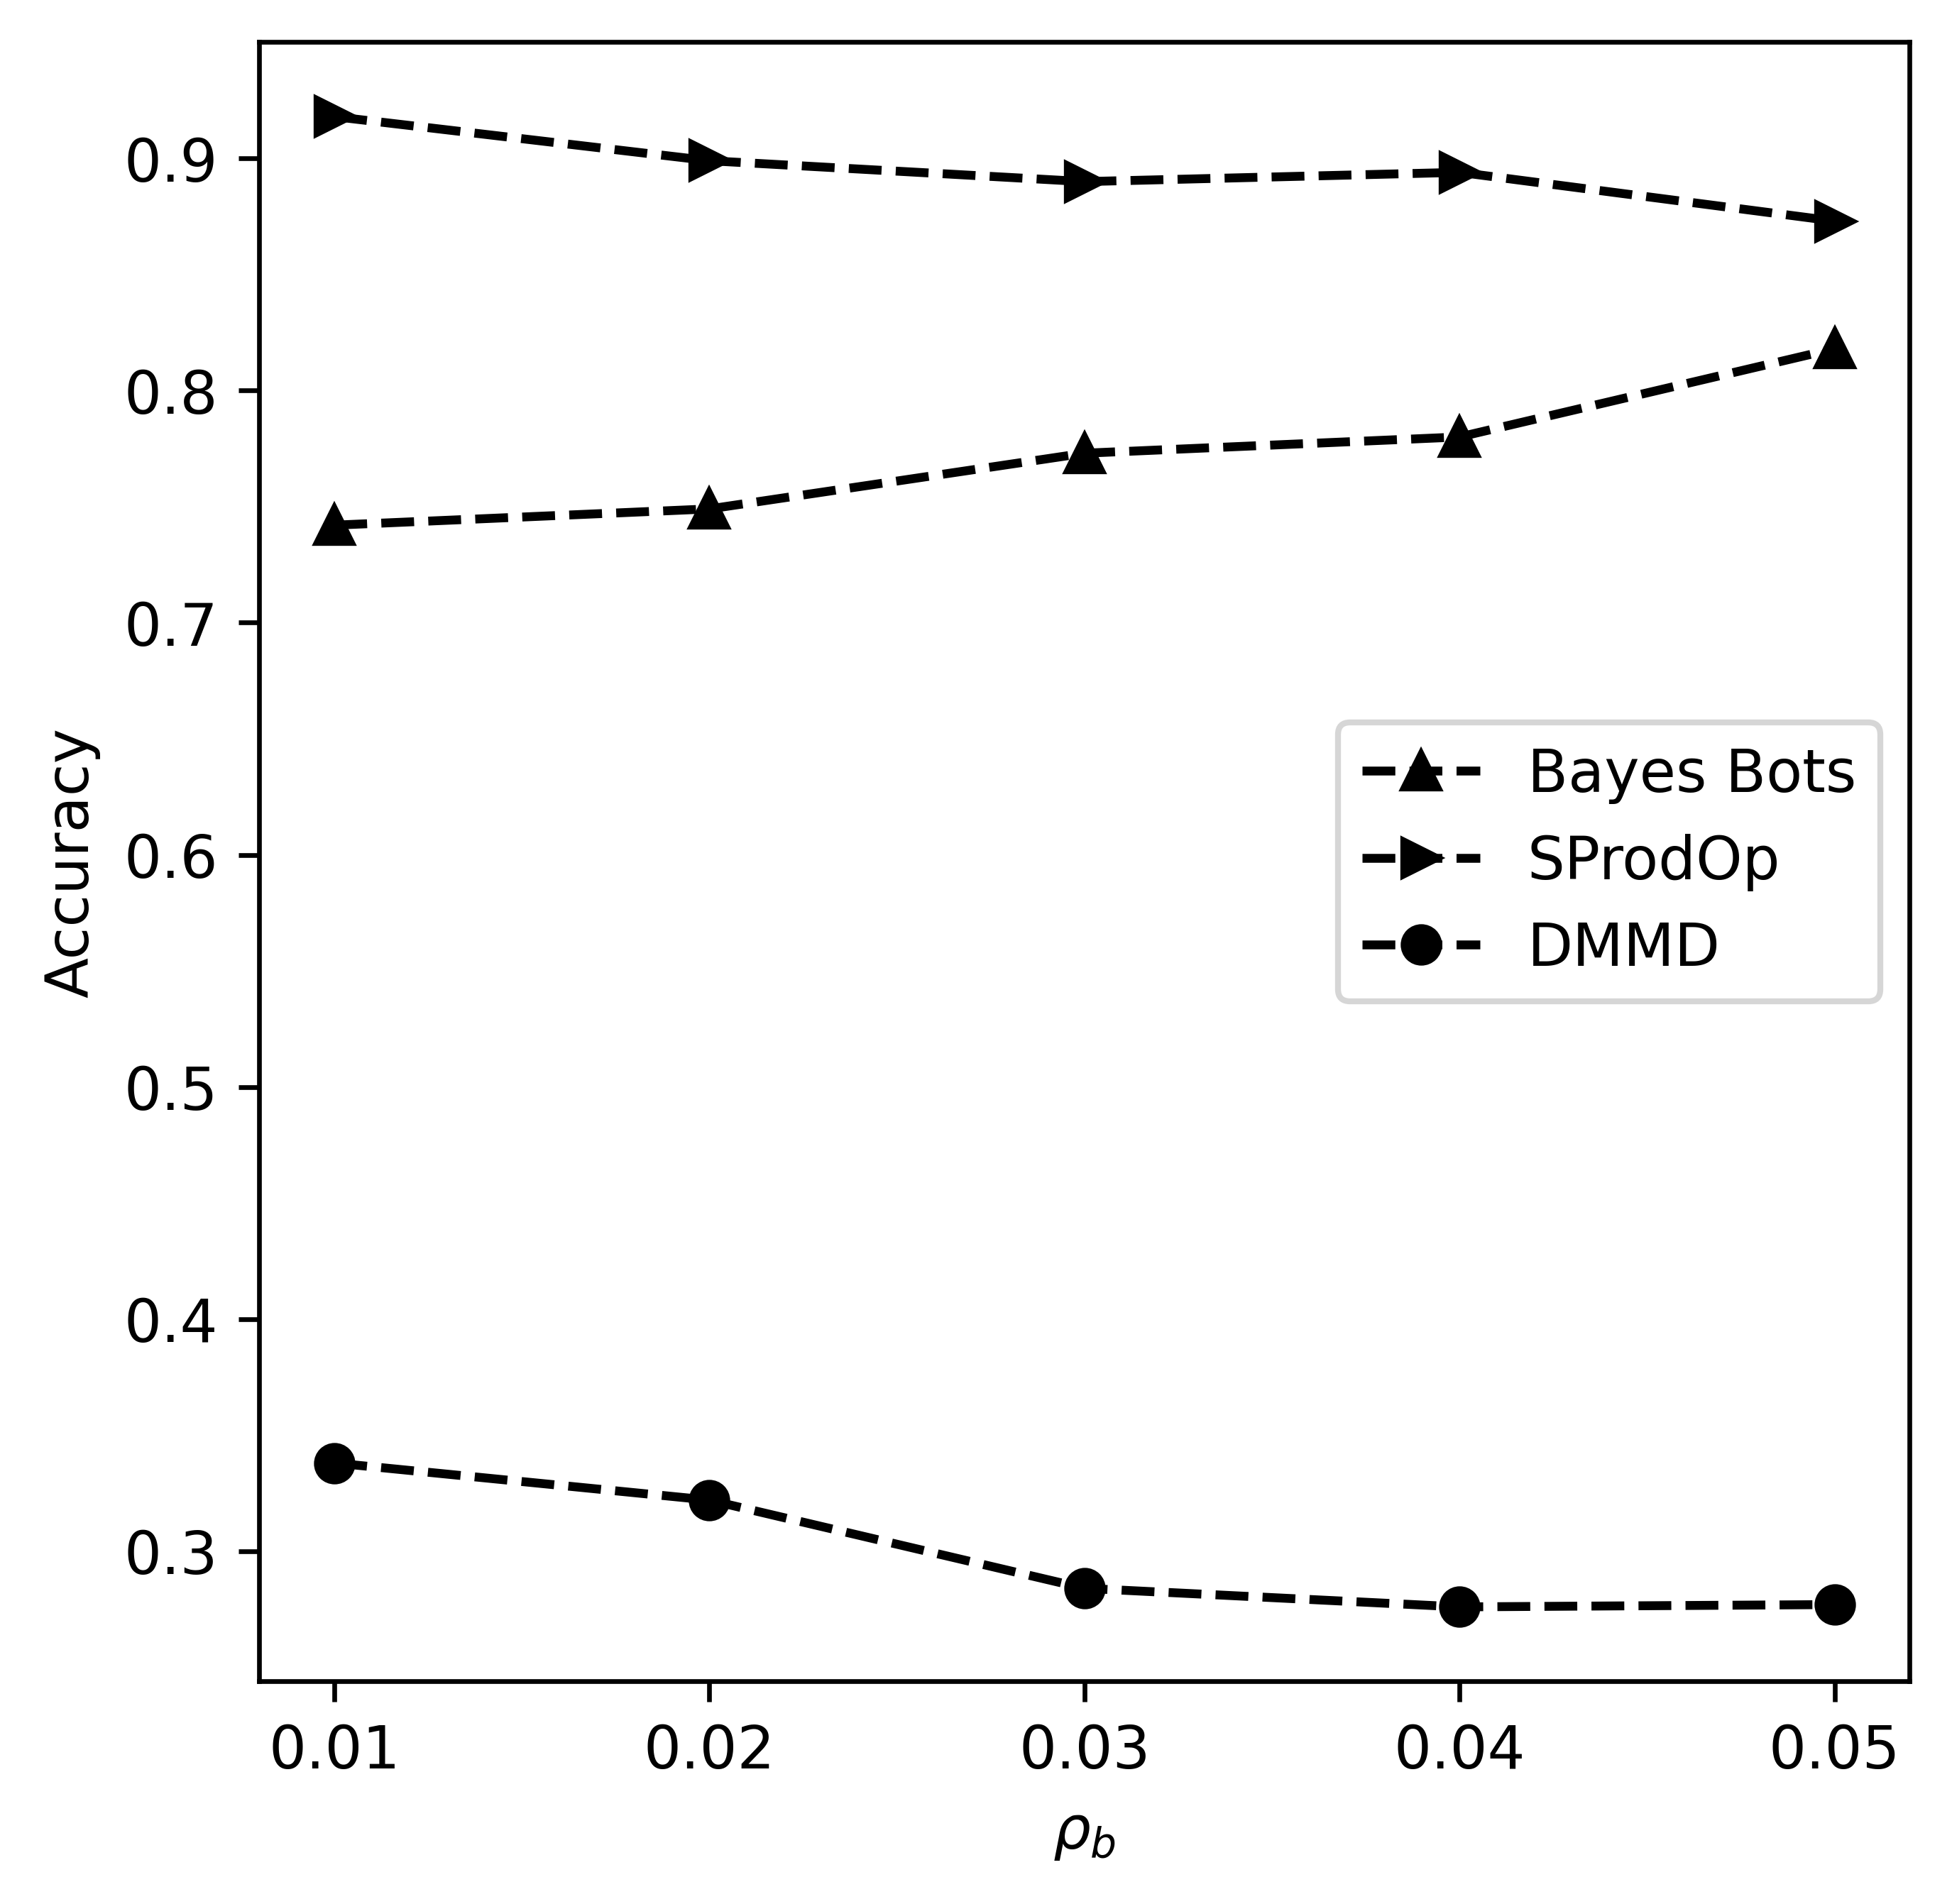

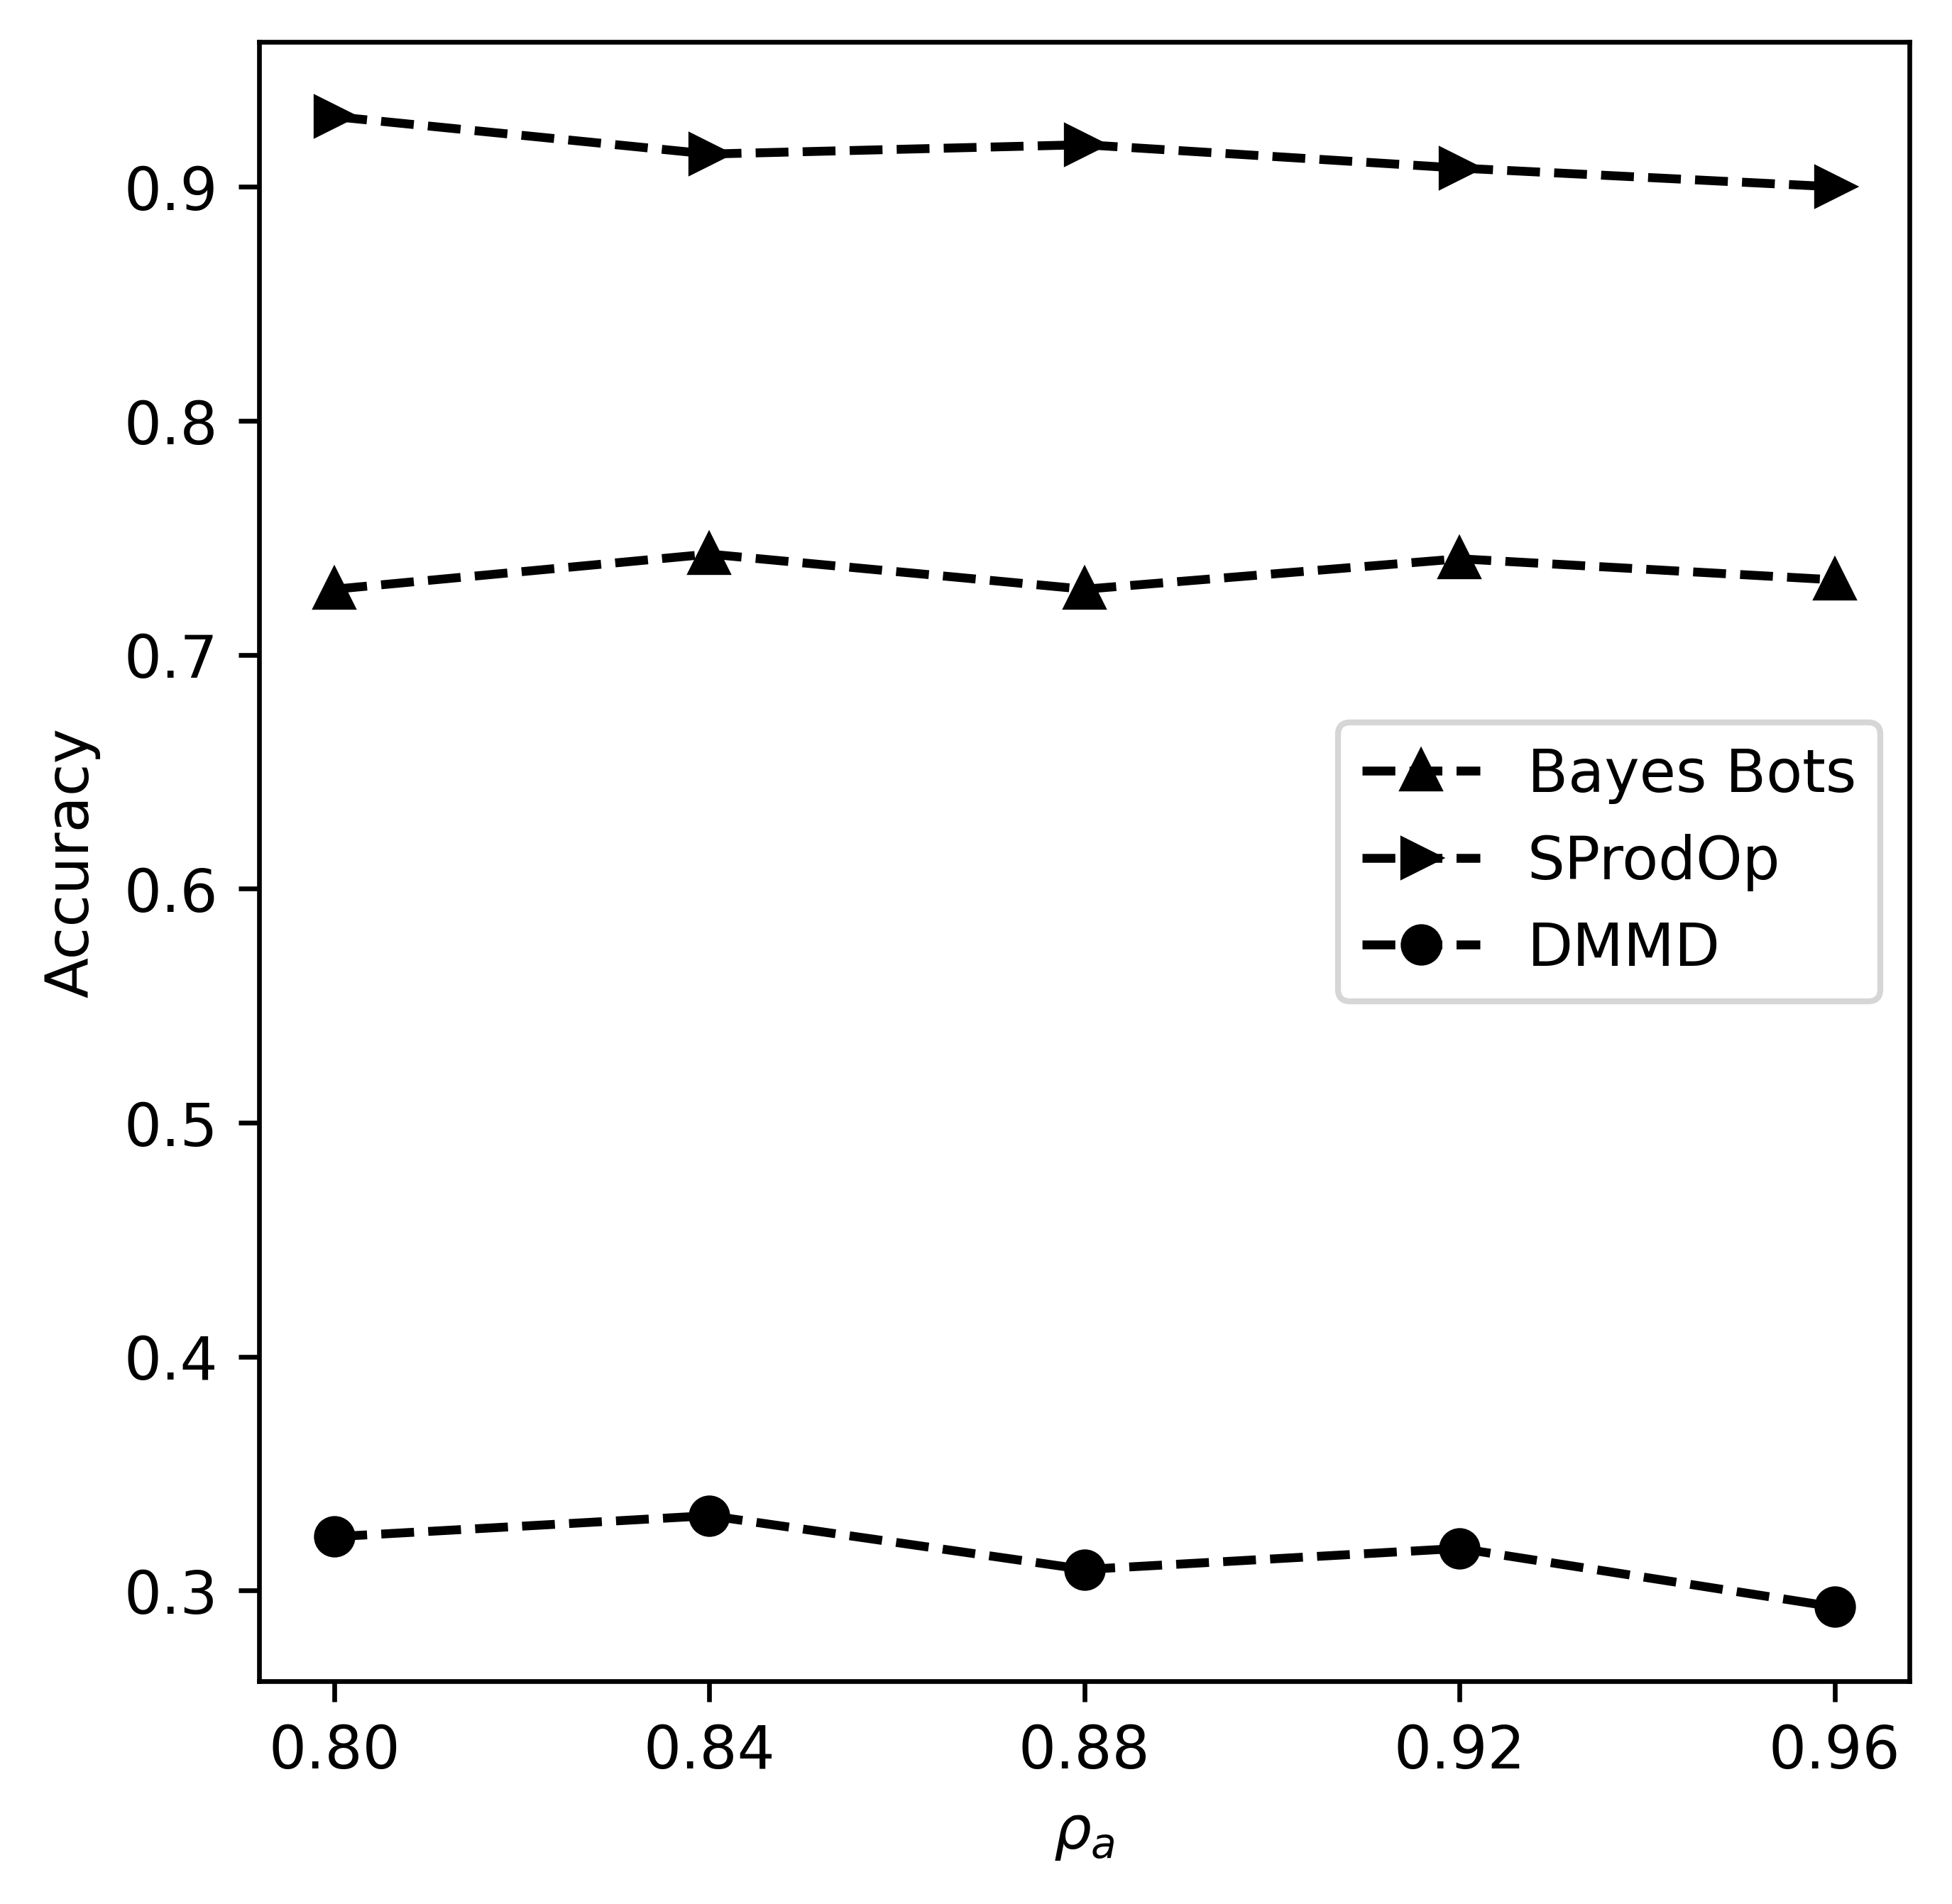

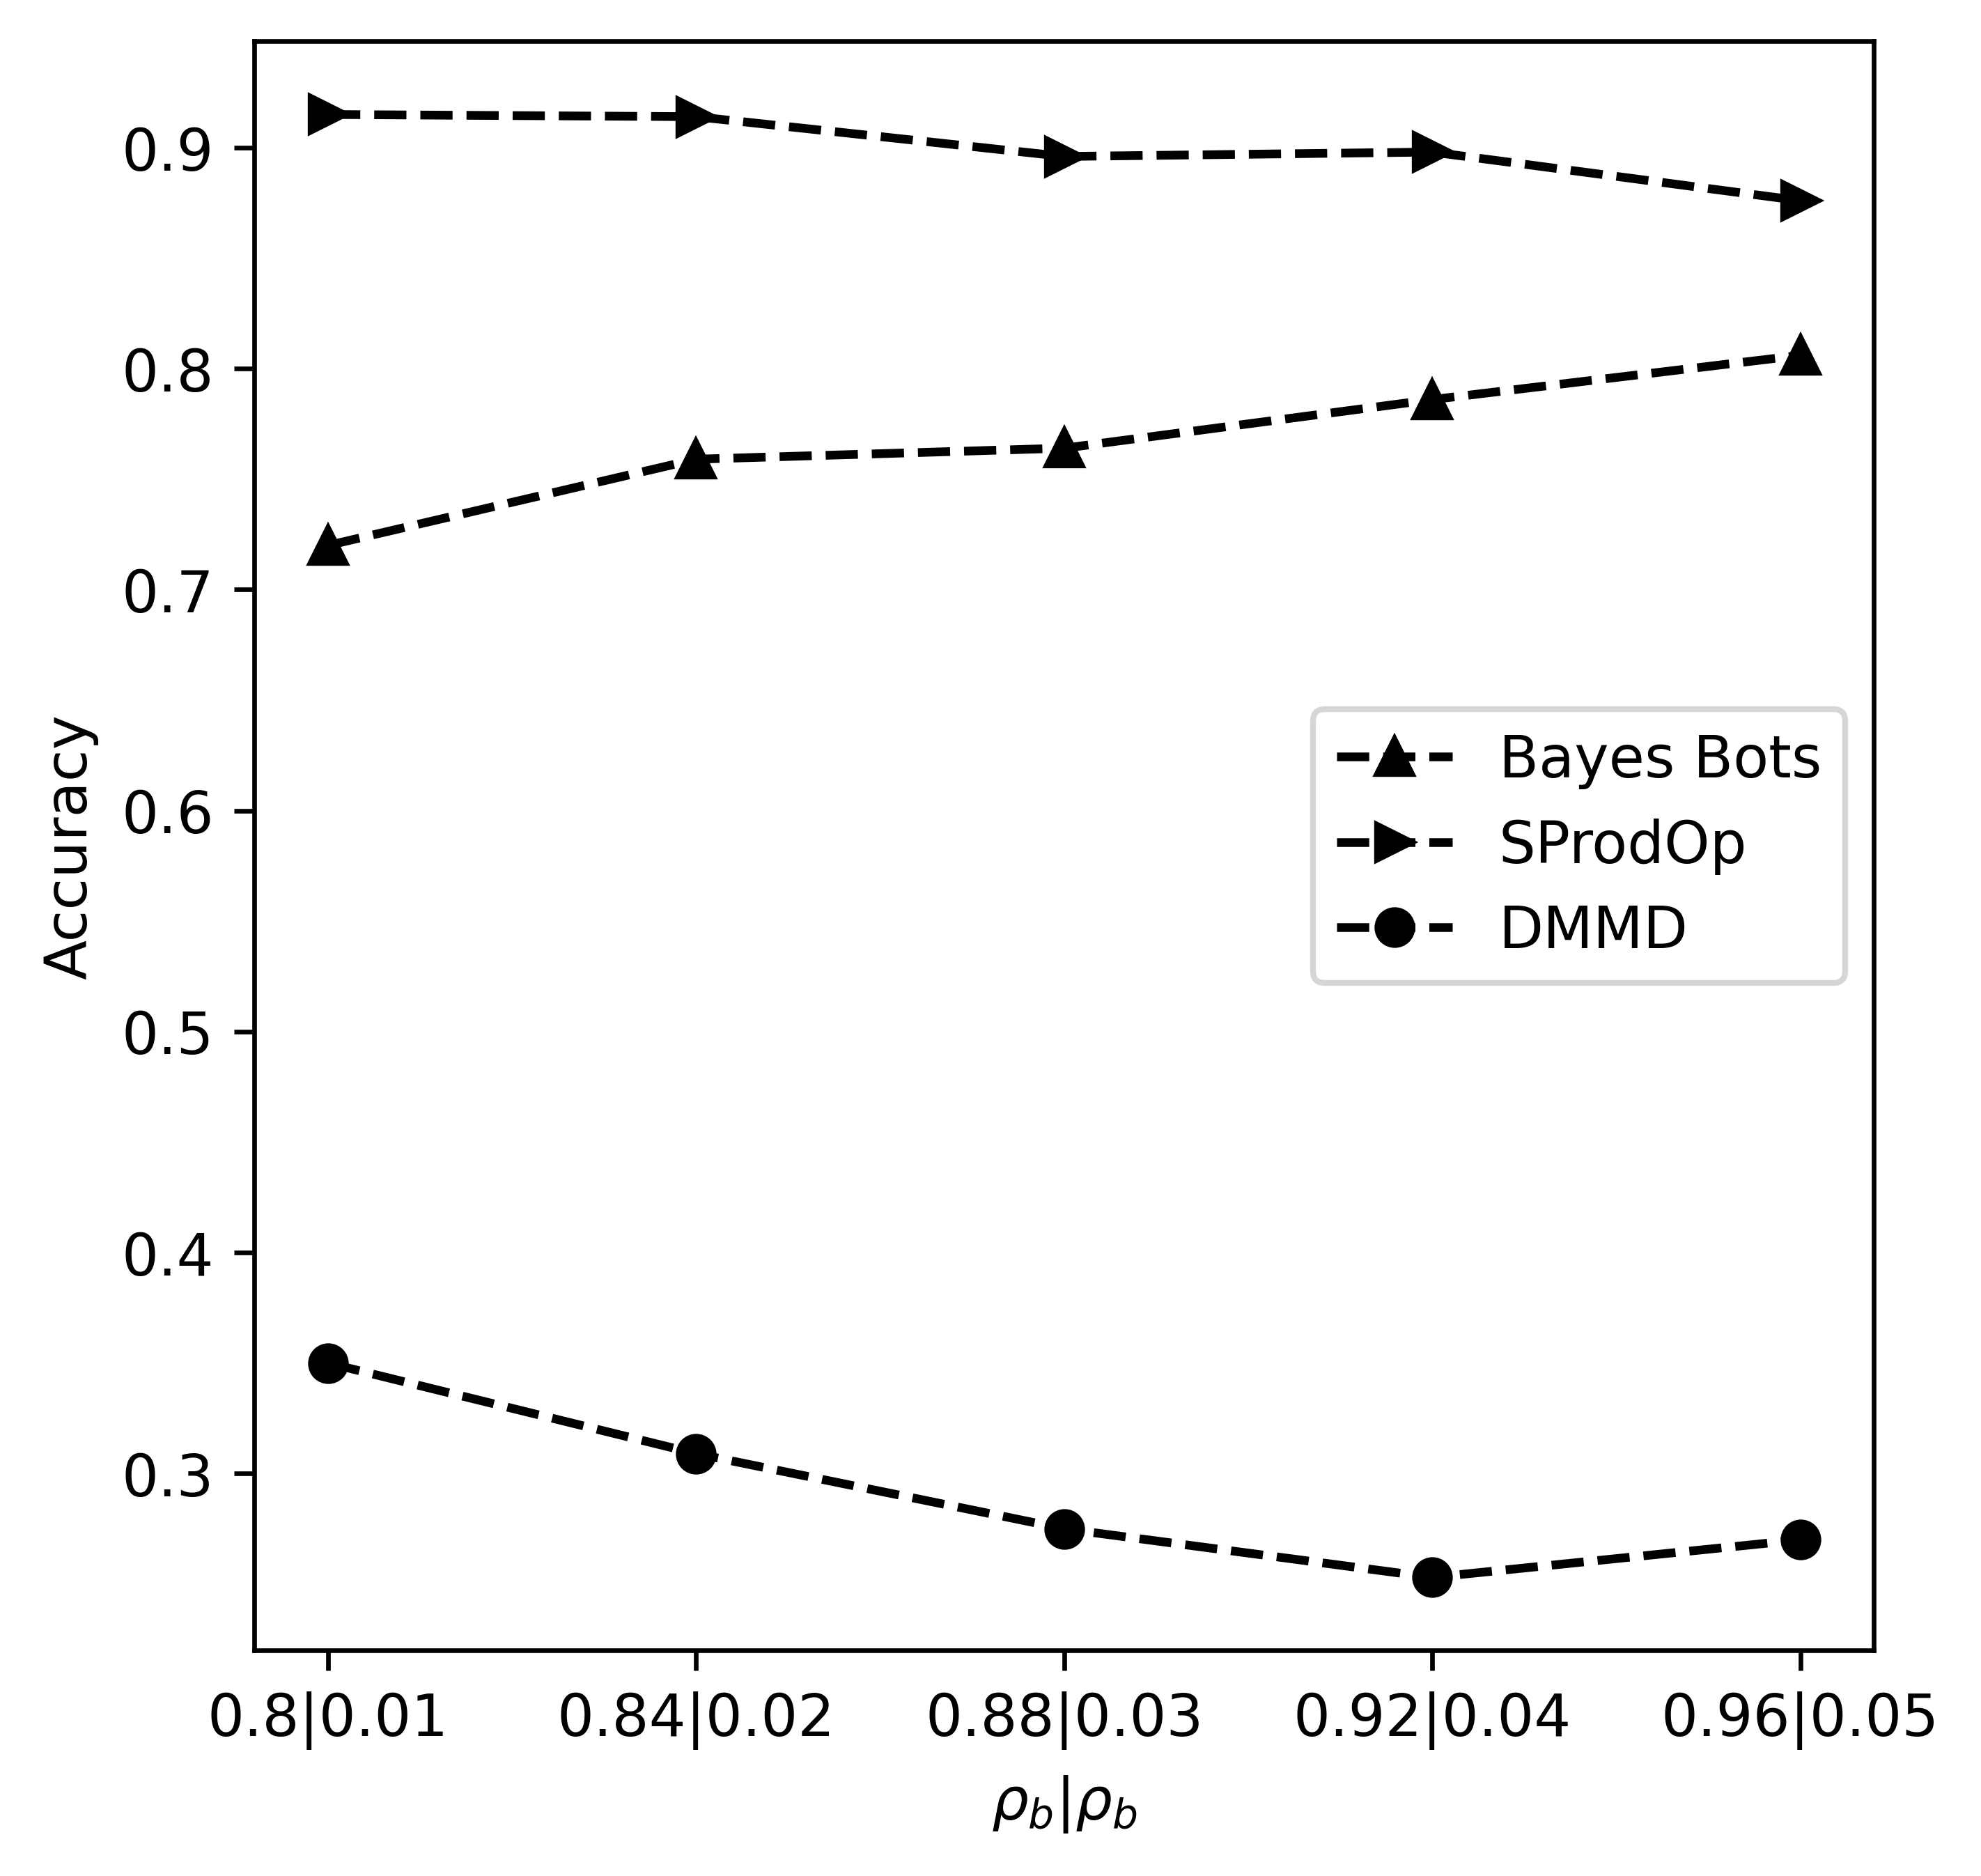

In [103]:
mark = ['^', '>', 'o']
labels = ["Bayes Bots", "SProdOp", "DMMD"]

parameters = [0.01, 0.02, 0.03, 0.04, 0.05]
fig, ax = plt.subplots(1,1,figsize = (5,5), dpi=600)
sparameters = ['1', '2', '3', '4', '5']
for i, strategy in enumerate(['BBots-FP-', 'Pool-FP-', 'DMMD-FP-']):
    accs = []
    for parameter in sparameters:
        accs.append(len(Results['TTC'][strategy + parameter])/1000)
    ax.plot(parameters, accs, mark[i], linestyle=mrkr, color='k', label=labels[i])

ax.set_xticks(parameters)
ax.set_ylabel('Accuracy')
ax.set_xlabel('$ρ_b$')
ax.legend()


parameters = [0.8, 0.84, 0.88, 0.92, 0.96]
sparameters = ['80', '84', '88', '92', '96']
fig, ax = plt.subplots(1,1,figsize = (5,5), dpi=600)
for i, strategy in enumerate(['BBots-TP-', 'Pool-TP-', 'DMMD-TP-']):
    accs = []
    for parameter in sparameters:
        accs.append(len(Results['TTC'][strategy + parameter])/1000)
    ax.plot(parameters, accs, mark[i], linestyle=mrkr, color='k', label=labels[i])

ax.set_xticks(parameters)
ax.set_ylabel('Accuracy')
ax.set_xlabel('$ρ_a$')
ax.legend()


fig, ax = plt.subplots(1,1,figsize = (5,5), dpi=600)
parameters = [0.01, 0.02, 0.03, 0.04, 0.05]
sparameters = ['80-1', '84-2', '88-3', '92-4', '96-5']
for i, strategy in enumerate(['BBots-', 'Pool-', 'DMMD-']):
    accs = []
    for parameter in sparameters:
        accs.append(len(Results['TTC'][strategy + parameter])/1000)
    ax.plot(parameters, accs, mark[i], linestyle=mrkr, color='k', label=labels[i])

ax.set_xticks(parameters)
ax.set_xticklabels(['0.8|0.01', '0.84|0.02', '0.88|0.03', '0.92|0.04', '0.96|0.05'])
ax.set_ylabel('Accuracy')

ax.set_xlabel('$ρ_b | ρ_b$')
ax.legend()

plt.show()

    

# TP, FP Figure making

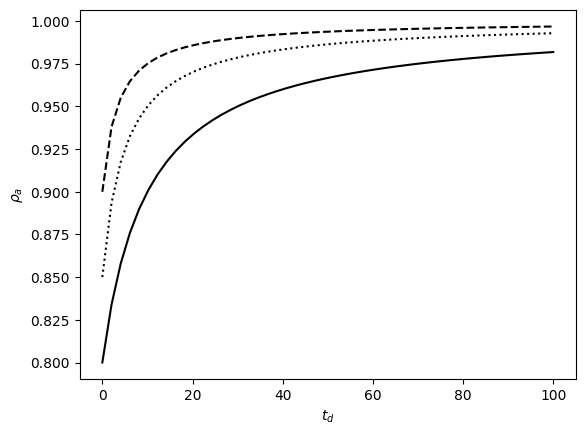

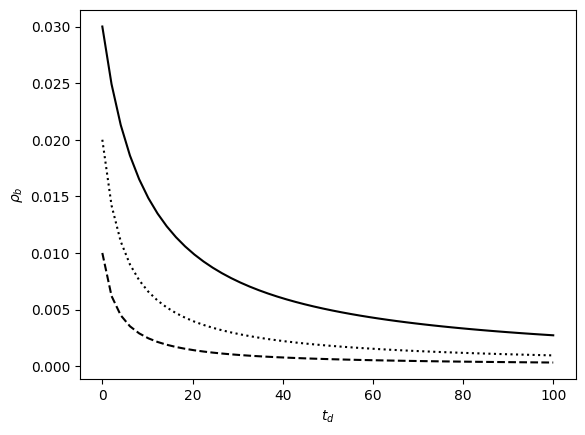

In [42]:
def get_true_positive(init_tp, tracking_time, alpha=0.2):
    """
    Get the true positive rate for a given time having tracked
    """
    true_positive = (init_tp + alpha*tracking_time)/(1 + alpha*tracking_time)
    return true_positive

def get_false_positive(init_fp, tracking_time, alpha=0.2):
    """
    Get the false positive rate for a given time having tracked
    """
    false_positive = 1 - ((1 - init_fp + alpha*tracking_time)/(1 + alpha*tracking_time))
    return false_positive

t = np.linspace(0,100)
tp = []

tp_parameter_pairs = [(0.8, 0.1), (0.85, 0.2), (0.9, 0.3)]


marker_style_idx = 0
markers = ['solid', 'dotted', 'dashed']
for pair in tp_parameter_pairs:
    for time in t:
        tp.append(get_true_positive(pair[0], time, pair[1]))
    plt.plot(t,tp, c='black', linestyle=markers[marker_style_idx])
    marker_style_idx += 1
    tp.clear()

plt.xlabel('$t_d$')
plt.ylabel('$ρ_a$')
plt.savefig('TP.png', dpi=600)
plt.show()

fp = []

fp_parameter_pairs = [(0.03, 0.1), (0.02, 0.2), (0.01, 0.3)]

marker_style_idx = 0

for pair in fp_parameter_pairs:
    for time in t:
        fp.append(get_false_positive(pair[0], time, pair[1]))
    plt.plot(t,fp, c='black', linestyle=markers[marker_style_idx])
    marker_style_idx += 1
    fp.clear()

plt.xlabel('$t_d$')
plt.ylabel('$ρ_b$')
plt.savefig('FP.png', dpi=600)
plt.show()
